# Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import plotly.express as px

In [2]:
df_house = pd.read_csv('melb_data.csv')
pd.set_option('display.max_columns', 50)
df_house.head()

Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0  3/12/2016       2.5    3067.0       2.0       1.0  1.0     202.0   
1  4/02/2016       2.5    3067.0       2.0       1.0  0.0     156.0   
2  4/03/2017       2.5    3067.0       3.0       2.0  0.0     134.0   
3  4/03/2017       2.5    3067.0       3.0       2.0  1.0      94.0   
4  4/06/2016       2.5    3067.0       3.0       1.0  2.0     120.0   

   BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
0           NaN        NaN       Yarra   -37.7996    144.9984   
1          79.0     1900.0       Yarra   -37.8079    144.9934   
2         150.0     1900.0       Yarra   -37.8093    144.9944   
3           NaN        NaN       Yarra   -37.7969    144.9969   
4         142.0     2014.0       Yarra   -37.8072    144.9941   

              Regionname  Propertycount  
0  Northern Metropolitan         4019.0  
1  Northern Metropolitan         4019.0  
2  Northern Metropolitan         4019.0  
3  Northern Metropolitan         4019.0  
4  Northern Metropolitan         4019.0

## Introduction Of The Raw Data (Feature observation)

In [5]:
df_house.info

<bound method DataFrame.info of               Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford      85 Turner St      2    h  1480000.0      S   
1         Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2         Abbotsford      5 Charles St      3    h  1465000.0     SP   
3         Abbotsford  40 Federation La      3    h   850000.0     PI   
4         Abbotsford       55a Park St      4    h  1600000.0     VB   
...              ...               ...    ...  ...        ...    ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000.0      S   
13576   Williamstown     77 Merrett Dr      3    h  1031000.0     SP   
13577   Williamstown       83 Power St      3    h  1170000.0      S   
13578   Williamstown      96 Verdon St      4    h  2500000.0     PI   
13579     Yarraville        6 Agnes St      4    h  1285000.0     SP   

        SellerG        Date  Distance  Postcode  Bedroom2  Bathroom  Car  \
0        Biggin   3/12/2016

#### For this housing dataset, we have totally 21 columns and 13580 row. It is a data of Melbourne housing sales within the year 2016-2017. The data contains basic information about houses:

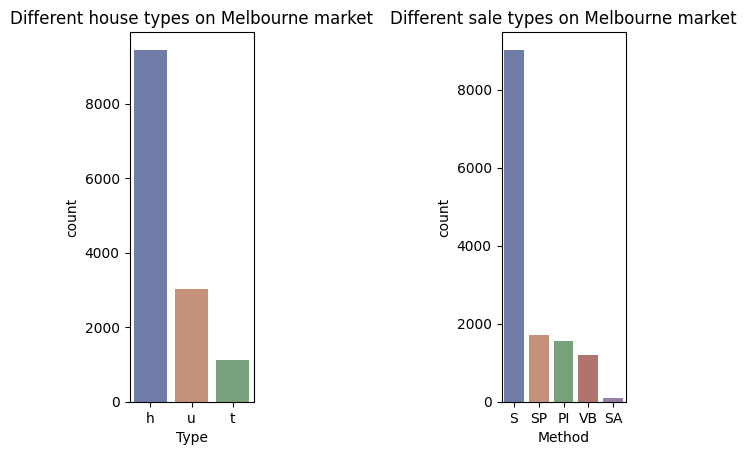

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.countplot(
    data=df_house, 
    x="Type",
    # errorbar="sd", 
    palette="dark", 
    alpha=.6,
    ax=ax1
)
ax1.set_title('Different house types on Melbourne market')

sns.countplot(
    data=df_house, 
    x="Method",
    # errorbar="sd", 
    palette="dark", 
    alpha=.6,
    ax=ax2
)
ax2.set_title('Different sale types on Melbourne market')
plt.subplots_adjust(wspace=2)
plt.show()

# g.despine(left=True)
# g.set_axis_labels("", "Body mass (g)")
# g.legend.set_title("Different house type on Melbourne market")

#### For this housing dataset, we have totally 21 columns and 13580 row. It is a data of Melbourne housing sales within the year 2016-2017. The data contains basic information about houses.
### - Type: Property type.
#### T: townhouse 
#### U: unit
#### H:house.
### - Distance: Distance between Melbourne CBD and the property.
### - Address: Address for the property.
### - Postcode: Postcode for the property.
### - Suburb: Suburb for the property.
### - Latitude, Longitude: the geographic information for the property. 
### - Rooms, Bedroom2, Bathroom, Car: The number of rooms, bathrooms, and parking spaces provided in the property.
### - BuildingArea: building area
### - YearBuilt: Year of built.
### - Landsize: Land size.
### - CouncilArea: Council that the property belong to. 
### - Regionname: Region.
## It also includes sales information: 
### - Date: Date of sold. 
### - Price: price of sold.
### - SellerG: selling agent
### - Method: selling method.
####      S - property sold; 
####      SP - property sold prior; 
####      PI - property passed in; 
####      VB - vendor bid; 
####      SA - sold after auction; 
### - Propertycount: Property that still on the market for sale.

In [7]:
df_house.describe()

Rooms         Price      Distance      Postcode      Bedroom2  \
count  13580.000000  1.358000e+04  13580.000000  13580.000000  13580.000000   
mean       2.937997  1.075684e+06     10.137776   3105.301915      2.914728   
std        0.955748  6.393107e+05      5.868725     90.676964      0.965921   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.500000e+05      6.100000   3044.000000      2.000000   
50%        3.000000  9.030000e+05      9.200000   3084.000000      3.000000   
75%        3.000000  1.330000e+06     13.000000   3148.000000      3.000000   
max       10.000000  9.000000e+06     48.100000   3977.000000     20.000000   

           Bathroom           Car       Landsize  BuildingArea    YearBuilt  \
count  13580.000000  13518.000000   13580.000000   7130.000000  8205.000000   
mean       1.534242      1.610075     558.416127    151.967650  1964.684217   
std        0.691712      0.962634    3990.669241    541.014538    37.273762   
min        0.000000      0.000000       0.000000      0.000000  1196.000000   
25%        1.000000      1.000000     177.000000     93.000000  1940.000000   
50%        1.000000      2.000000     440.000000    126.000000  1970.000000   
75%        2.000000      2.000000     651.000000    174.000000  1999.000000   
max        8.000000     10.000000  433014.000000  44515.000000  2018.000000   

          Lattitude    Longtitude  Propertycount  
count  13580.000000  13580.000000   13580.000000  
mean     -37.809203    144.995216    7454.417378  
std        0.079260      0.103916    4378.581772  
min      -38.182550    144.431810     249.000000  
25%      -37.856822    144.929600    4380.000000  
50%      -37.802355    145.000100    6555.000000  
75%      -37.756400    145.058305   10331.000000  
max      -37.408530    145.526350   21650.000000

In [8]:
df_house.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

# Data Cleaning

## 1. Data Type Management

### Through preliminary observation of the data, we can identify some unusual means:
### 1. Postcode. which should be of type "object", but in the data, it appears as "float".
### 2. Bedroom number, bathroom number and car number, should be the same data type of 'rooms', but it shows 'float'.
### 3. Date. Should be datetime.
### 4. Year. Should be interger.
### All this data type need to be fixed to the correct data type.

### (1) Date

In [71]:
df_house['Date'] = df_house['Date'].replace('/', '-')
df_house['Date'] 

0       2016-03-12
1       2016-04-02
2       2017-04-03
3       2017-04-03
4       2016-04-06
           ...    
13575   2017-08-26
13576   2017-08-26
13577   2017-08-26
13578   2017-08-26
13579   2017-08-26
Name: Date, Length: 13580, dtype: datetime64[ns]

In [53]:
df_house['Date'] = pd.to_datetime(df_house['Date'])

In [55]:
df_house['Date'].dtypes

dtype('<M8[ns]')

In [79]:
df_house

Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford      85 Turner St      2    h  1480000.0      S   
1         Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2         Abbotsford      5 Charles St      3    h  1465000.0     SP   
3         Abbotsford  40 Federation La      3    h   850000.0     PI   
4         Abbotsford       55a Park St      4    h  1600000.0     VB   
...              ...               ...    ...  ...        ...    ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000.0      S   
13576   Williamstown     77 Merrett Dr      3    h  1031000.0     SP   
13577   Williamstown       83 Power St      3    h  1170000.0      S   
13578   Williamstown      96 Verdon St      4    h  2500000.0     PI   
13579     Yarraville        6 Agnes St      4    h  1285000.0     SP   

        SellerG       Date  Distance  Postcode  Bedroom2  Bathroom  Car  \
0        Biggin 2016-03-12       2.5    3067.0       2.0       1.0  1.0   
1        Biggin 2016-04-02       2.5    3067.0       2.0       1.0  0.0   
2        Biggin 2017-04-03       2.5    3067.0       3.0       2.0  0.0   
3        Biggin 2017-04-03       2.5    3067.0       3.0       2.0  1.0   
4        Nelson 2016-04-06       2.5    3067.0       3.0       1.0  2.0   
...         ...        ...       ...       ...       ...       ...  ...   
13575     Barry 2017-08-26      16.7    3150.0       4.0       2.0  2.0   
13576  Williams 2017-08-26       6.8    3016.0       3.0       2.0  2.0   
13577     Raine 2017-08-26       6.8    3016.0       3.0       2.0  4.0   
13578   Sweeney 2017-08-26       6.8    3016.0       4.0       1.0  5.0   
13579   Village 2017-08-26       6.3    3013.0       4.0       1.0  1.0   

       Landsize  BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
0         202.0           NaN        NaN       Yarra  -37.79960   144.99840   
1         156.0          79.0     1900.0       Yarra  -37.80790   144.99340   
2         134.0         150.0     1900.0       Yarra  -37.80930   144.99440   
3          94.0           NaN        NaN       Yarra  -37.79690   144.99690   
4         120.0         142.0     2014.0       Yarra  -37.80720   144.99410   
...         ...           ...        ...         ...        ...         ...   
13575     652.0           NaN     1981.0         NaN  -37.90562   145.16761   
13576     333.0         133.0     1995.0         NaN  -37.85927   144.87904   
13577     436.0           NaN     1997.0         NaN  -37.85274   144.88738   
13578     866.0         157.0     1920.0         NaN  -37.85908   144.89299   
13579     362.0         112.0     1920.0         NaN  -37.81188   144.88449   

                       Regionname  Propertycount  
0           Northern Metropolitan         4019.0  
1           Northern Metropolitan         4019.0  
2           Northern Metropolitan         4019.0  
3           Northern Metropolitan         4019.0  
4           Northern Metropolitan         4019.0  
...                           ...            ...  
13575  South-Eastern Metropolitan         7392.0  
13576        Western Metropolitan         6380.0  
13577        Western Metropolitan         6380.0  
13578        Western Metropolitan         6380.0  
13579        Western Metropolitan         6543.0  

[13580 rows x 21 columns]

## 2. Filling Missing Data

In [9]:
df_house.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

### In the df_house data, it do have different null values.
### Car space: 62
### Building Area: 6450
### Year of Built: 5375
### Council Area: 1369

## 2. After a basic research of the raw data, now we need to fill the missing data.

### 2.1 Car

In [10]:
df_house[df_house['Car'].isnull()]

Suburb            Address  Rooms Type      Price Method  \
12221       Ascot Vale     132 The Parade      3    h   985000.0      S   
12247   Brunswick East        18 Ethel St      2    h  1023000.0      S   
12259     Clifton Hill      34 Fenwick St      3    h  1436000.0      S   
12320    Glen Waverley      19 Diamond Av      3    h  1370000.0      S   
12362          Newport  11 Collingwood Rd      4    h  1180000.0     PI   
...                ...                ...    ...  ...        ...    ...   
13496     Moonee Ponds     46 Eglinton St      4    h  1525000.0      S   
13508  North Melbourne       9 Erskine St      2    h  1080000.0      S   
13522   Port Melbourne      201 Stokes St      2    h  1515000.0     SP   
13524          Prahran   17 Packington Pl      2    h  1365000.0      S   
13550   Sunshine North     5 Berkshire Rd      3    h   595000.0     SP   

         SellerG        Date  Distance  Postcode  Bedroom2  Bathroom  Car  \
12221       Brad   3/09/2017       4.3    3032.0       3.0       1.0  NaN   
12247     Domain   3/09/2017       4.0    3057.0       2.0       1.0  NaN   
12259     Jellis   3/09/2017       3.6    3068.0       3.0       2.0  NaN   
12320  Fletchers   3/09/2017      16.7    3150.0       3.0       1.0  NaN   
12362   Williams   3/09/2017       6.2    3015.0       4.0       1.0  NaN   
...          ...         ...       ...       ...       ...       ...  ...   
13496     Nelson  26/08/2017       6.2    3039.0       4.0       3.0  NaN   
13508     Jellis  26/08/2017       1.8    3051.0       2.0       1.0  NaN   
13522   Marshall  26/08/2017       3.5    3207.0       2.0       2.0  NaN   
13524     Jellis  26/08/2017       4.6    3181.0       2.0       1.0  NaN   
13550      Barry  26/08/2017      10.5    3020.0       3.0       1.0  NaN   

       Landsize  BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
12221     245.0          91.0     1945.0         NaN  -37.77215   144.91144   
12247     154.0          76.0     1890.0         NaN  -37.77221   144.97537   
12259     123.0         128.0     1990.0         NaN  -37.78888   145.00036   
12320     652.0           NaN        NaN         NaN  -37.87170   145.17267   
12362     545.0           NaN        NaN         NaN  -37.84399   144.89125   
...         ...           ...        ...         ...        ...         ...   
13496     233.0           NaN        NaN         NaN  -37.76884   144.91708   
13508     100.0          67.0     1890.0         NaN  -37.79524   144.94642   
13522     197.0           NaN        NaN         NaN  -37.83754   144.93954   
13524     206.0         100.0     1900.0         NaN  -37.85569   145.00522   
13550     589.0           NaN        NaN         NaN  -37.76599   144.84445   

                  Regionname  Propertycount  
12221   Western Metropolitan         6567.0  
12247  Northern Metropolitan         5533.0  
12259  Northern Metropolitan         2954.0  
12320   Eastern Metropolitan        15321.0  
12362   Western Metropolitan         5498.0  
...                      ...            ...  
13496   Western Metropolitan         6232.0  
13508  Northern Metropolitan         6821.0  
13522  Southern Metropolitan         8648.0  
13524  Southern Metropolitan         7717.0  
13550   Western Metropolitan         4217.0  

[62 rows x 21 columns]

### After doing the online reserch, we can realize that all the property information with null car spot, which is because they are 'Terrace house' and with no equipped parking space. We can fill the null value with 0.

In [11]:
#unit和house分别研究

In [12]:
df_house['Car'] = df_house['Car'].fillna(df_house[df_house['Car'].isnull()]['Car'] == 0)

### 2.2 Building Area. 

In [13]:
# pd.set_option('display.max_row', None)
df_house.loc[df_house['BuildingArea'].isnull()].head(10)

Suburb             Address  Rooms Type      Price Method  SellerG  \
0   Abbotsford        85 Turner St      2    h  1480000.0      S   Biggin   
3   Abbotsford    40 Federation La      3    h   850000.0     PI   Biggin   
5   Abbotsford      129 Charles St      2    h   941000.0      S   Jellis   
8   Abbotsford  6/241 Nicholson St      1    u   300000.0      S   Biggin   
10  Abbotsford  411/8 Grosvenor St      2    u   700000.0     VB   Jellis   
13  Abbotsford       45 William St      2    h  1172500.0      S   Biggin   
14  Abbotsford  7/20 Abbotsford St      1    u   441000.0     SP     Greg   
18  Abbotsford    196 Nicholson St      3    h   955000.0      S  Collins   
21  Abbotsford  13/11 Nicholson St      3    t   900000.0      S   Beller   
26  Abbotsford  5/20 Abbotsford St      1    u   426000.0     SP     Greg   

          Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0    3/12/2016       2.5    3067.0       2.0       1.0  1.0     202.0   
3    4/03/2017       2.5    3067.0       3.0       2.0  1.0      94.0   
5    7/05/2016       2.5    3067.0       2.0       1.0  0.0     181.0   
8    8/10/2016       2.5    3067.0       1.0       1.0  1.0       0.0   
10  12/11/2016       2.5    3067.0       2.0       2.0  1.0       0.0   
13  13/08/2016       2.5    3067.0       2.0       1.0  1.0     195.0   
14  14/05/2016       2.5    3067.0       1.0       1.0  1.0       0.0   
18  17/09/2016       2.5    3067.0       3.0       1.0  0.0     183.0   
21  18/03/2017       2.5    3067.0       3.0       2.0  2.0       0.0   
26  22/08/2016       2.5    3067.0       1.0       1.0  1.0       0.0   

    BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
0            NaN        NaN       Yarra   -37.7996    144.9984   
3            NaN        NaN       Yarra   -37.7969    144.9969   
5            NaN        NaN       Yarra   -37.8041    144.9953   
8            NaN        NaN       Yarra   -37.8008    144.9973   
10           NaN        NaN       Yarra   -37.8110    145.0067   
13           NaN        NaN       Yarra   -37.8084    144.9973   
14           NaN        NaN       Yarra   -37.8016    144.9988   
18           NaN        NaN       Yarra   -37.8022    144.9975   
21           NaN     2010.0       Yarra   -37.8093    144.9959   
26           NaN        NaN       Yarra   -37.8016    144.9988   

               Regionname  Propertycount  
0   Northern Metropolitan         4019.0  
3   Northern Metropolitan         4019.0  
5   Northern Metropolitan         4019.0  
8   Northern Metropolitan         4019.0  
10  Northern Metropolitan         4019.0  
13  Northern Metropolitan         4019.0  
14  Northern Metropolitan         4019.0  
18  Northern Metropolitan         4019.0  
21  Northern Metropolitan         4019.0  
26  Northern Metropolitan         4019.0

In [14]:
## subsample checked already

### 2.3 CouncilArea


In [15]:
# pd.set_option('display.max_row', None)
df_house.loc[df_house['CouncilArea'].isnull()].head(10)

Suburb         Address  Rooms Type      Price Method  \
7584    Brighton East    7 Roberts Ct      3    h  1270000.0     VB   
10797       Reservoir  48 Crevelli St      3    h   526250.0     SP   
12213      Aberfeldie       1 Alma St      4    h  1436000.0      S   
12214          Albion    40 Ridley St      5    h   905000.0      S   
12215      Alphington    22 Harker St      4    h  1680000.0      S   
12216          Altona   86 Grieve Pde      3    h   913000.0      S   
12217  Altona Meadows    96 Linden St      3    h   590000.0     PI   
12218    Altona North    95 Marion St      3    h  1070000.0     PI   
12219        Armadale  121 Kooyong Rd      4    h  5100000.0      S   
12220        Armadale  2/26 Mercer Rd      2    u   820000.0      S   

             SellerG        Date  Distance  Postcode  Bedroom2  Bathroom  Car  \
7584             Ray  20/05/2017      10.7    3187.0       3.0       1.0  3.0   
10797          Barry   8/07/2017      12.0    3073.0       3.0       1.0  1.0   
12213           Brad   3/09/2017       7.5    3040.0       4.0       3.0  3.0   
12214  hockingstuart   3/09/2017      10.5    3020.0       5.0       2.0  3.0   
12215           Love   3/09/2017       5.7    3078.0       4.0       3.0  2.0   
12216           Greg   3/09/2017      11.0    3018.0       3.0       2.0  3.0   
12217  hockingstuart   3/09/2017      15.5    3028.0       3.0       1.0  2.0   
12218             RT   3/09/2017       9.4    3025.0       3.0       1.0  3.0   
12219       Marshall   3/09/2017       6.3    3143.0       4.0       2.0  2.0   
12220         Jellis   3/09/2017       6.3    3143.0       2.0       1.0  1.0   

       Landsize  BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
7584      724.0           NaN        NaN         NaN  -37.92910   145.02970   
10797     308.0           NaN        NaN         NaN  -37.72828   145.03033   
12213     511.0         187.0     1922.0         NaN  -37.75788   144.90487   
12214     732.0           NaN     1925.0         NaN  -37.78345   144.82295   
12215     720.0           NaN        NaN         NaN  -37.77928   145.02993   
12216     530.0         148.0     1985.0         NaN  -37.86140   144.81931   
12217     459.0           NaN        NaN         NaN  -37.87063   144.77632   
12218     693.0         134.0     1950.0         NaN  -37.83511   144.84905   
12219     761.0         255.0     1900.0         NaN  -37.85249   145.02091   
12220    1501.0           NaN        NaN         NaN  -37.85280   145.02684   

                  Regionname  Propertycount  
7584   Southern Metropolitan         6938.0  
10797  Northern Metropolitan        21650.0  
12213   Western Metropolitan         1543.0  
12214   Western Metropolitan         2185.0  
12215  Northern Metropolitan         2211.0  
12216   Western Metropolitan         5301.0  
12217   Western Metropolitan         7630.0  
12218   Western Metropolitan         5132.0  
12219  Southern Metropolitan         4836.0  
12220  Southern Metropolitan         4836.0

#### Through doing research about the raw, we first use the existing value to fill the council data

In [16]:
council_null = df_house[df_house['CouncilArea'].isnull()]['Suburb']
council_null.head(20)

7584      Brighton East
10797         Reservoir
12213        Aberfeldie
12214            Albion
12215        Alphington
12216            Altona
12217    Altona Meadows
12218      Altona North
12219          Armadale
12220          Armadale
12221        Ascot Vale
12222         Balaclava
12223      Balwyn North
12224      Balwyn North
12225      Balwyn North
12226      Balwyn North
12227         Bayswater
12228    Bentleigh East
12229    Bentleigh East
12230    Bentleigh East
Name: Suburb, dtype: object

In [17]:
council_not_null = df_house[~df_house['CouncilArea'].isnull()][['Suburb','CouncilArea']]
council_not_null.head(20)

Suburb CouncilArea
0   Abbotsford       Yarra
1   Abbotsford       Yarra
2   Abbotsford       Yarra
3   Abbotsford       Yarra
4   Abbotsford       Yarra
5   Abbotsford       Yarra
6   Abbotsford       Yarra
7   Abbotsford       Yarra
8   Abbotsford       Yarra
9   Abbotsford       Yarra
10  Abbotsford       Yarra
11  Abbotsford       Yarra
12  Abbotsford       Yarra
13  Abbotsford       Yarra
14  Abbotsford       Yarra
15  Abbotsford       Yarra
16  Abbotsford       Yarra
17  Abbotsford       Yarra
18  Abbotsford       Yarra
19  Abbotsford       Yarra

In [18]:
#Find council name from the exist row
def find_council(x):
    # print(x)
    suburb = x.strip()
    suburb_with_council = council_not_null[council_not_null['Suburb'] == x].reset_index(drop=True)
    if len(suburb_with_council) == 0:
        return 'unknown'
    else:
        # print(suburb_with_council)
        return suburb_with_council['CouncilArea'][0]
        

In [19]:
find_council('Abbotsford')

'Yarra'

In [20]:
# council_not_null[council_not_null['Suburb'] == 'Brighton East']   
df_house.loc[df_house['CouncilArea'].isnull(), 'CouncilArea'] = df_house[df_house['CouncilArea'].isnull()]['Suburb'].apply(find_council)
df_house

Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford      85 Turner St      2    h  1480000.0      S   
1         Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2         Abbotsford      5 Charles St      3    h  1465000.0     SP   
3         Abbotsford  40 Federation La      3    h   850000.0     PI   
4         Abbotsford       55a Park St      4    h  1600000.0     VB   
...              ...               ...    ...  ...        ...    ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000.0      S   
13576   Williamstown     77 Merrett Dr      3    h  1031000.0     SP   
13577   Williamstown       83 Power St      3    h  1170000.0      S   
13578   Williamstown      96 Verdon St      4    h  2500000.0     PI   
13579     Yarraville        6 Agnes St      4    h  1285000.0     SP   

        SellerG        Date  Distance  Postcode  Bedroom2  Bathroom  Car  \
0        Biggin   3/12/2016       2.5    3067.0       2.0       1.0  1.0   
1        Biggin   4/02/2016       2.5    3067.0       2.0       1.0  0.0   
2        Biggin   4/03/2017       2.5    3067.0       3.0       2.0  0.0   
3        Biggin   4/03/2017       2.5    3067.0       3.0       2.0  1.0   
4        Nelson   4/06/2016       2.5    3067.0       3.0       1.0  2.0   
...         ...         ...       ...       ...       ...       ...  ...   
13575     Barry  26/08/2017      16.7    3150.0       4.0       2.0  2.0   
13576  Williams  26/08/2017       6.8    3016.0       3.0       2.0  2.0   
13577     Raine  26/08/2017       6.8    3016.0       3.0       2.0  4.0   
13578   Sweeney  26/08/2017       6.8    3016.0       4.0       1.0  5.0   
13579   Village  26/08/2017       6.3    3013.0       4.0       1.0  1.0   

       Landsize  BuildingArea  YearBuilt  CouncilArea  Lattitude  Longtitude  \
0         202.0           NaN        NaN        Yarra  -37.79960   144.99840   
1         156.0          79.0     1900.0        Yarra  -37.80790   144.99340   
2         134.0         150.0     1900.0        Yarra  -37.80930   144.99440   
3          94.0           NaN        NaN        Yarra  -37.79690   144.99690   
4         120.0         142.0     2014.0        Yarra  -37.80720   144.99410   
...         ...           ...        ...          ...        ...         ...   
13575     652.0           NaN     1981.0       Monash  -37.90562   145.16761   
13576     333.0         133.0     1995.0  Hobsons Bay  -37.85927   144.87904   
13577     436.0           NaN     1997.0  Hobsons Bay  -37.85274   144.88738   
13578     866.0         157.0     1920.0  Hobsons Bay  -37.85908   144.89299   
13579     362.0         112.0     1920.0  Maribyrnong  -37.81188   144.88449   

                       Regionname  Propertycount  
0           Northern Metropolitan         4019.0  
1           Northern Metropolitan         4019.0  
2           Northern Metropolitan         4019.0  
3           Northern Metropolitan         4019.0  
4           Northern Metropolitan         4019.0  
...                           ...            ...  
13575  South-Eastern Metropolitan         7392.0  
13576        Western Metropolitan         6380.0  
13577        Western Metropolitan         6380.0  
13578        Western Metropolitan         6380.0  
13579        Western Metropolitan         6543.0  

[13580 rows x 21 columns]

#### After applying the function, we onlu have 7 suburb couldn't find existing data. we need to manually add their council name.

In [21]:
df_house.loc[df_house['CouncilArea'] == 'unknown'].head(10)

Suburb         Address  Rooms Type      Price Method    SellerG  \
12251      Burnside   22 Paringa Wy      3    h   657500.0     SP  Harcourts   
12438       Attwood      2 Herod Pl      3    h   640000.0     SP        YPA   
12865        Wallan   14 Danaher Av      3    h   366000.0      S        Ray   
13245  New Gisborne  71 Hamilton Rd      5    h  1355000.0      S      Raine   
13264      Plumpton       9 Remy Av      4    h   625500.0     SP        HAR   
13381      Burnside    18 Fydler Av      3    h   580000.0      S        YPA   
13494       Monbulk     21 David St      4    h   720000.0     SP  Fletchers   

             Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
12251   3/09/2017      14.8    3023.0       3.0       2.0  2.0     631.0   
12438   9/09/2017      16.5    3049.0       3.0       2.0  2.0     607.0   
12865  16/09/2017      44.2    3756.0       3.0       1.0  1.0     502.0   
13245  23/09/2017      48.1    3438.0       5.0       3.0  5.0   44500.0   
13264  23/09/2017      23.8    3335.0       4.0       2.0  2.0     477.0   
13381  26/08/2017      14.8    3023.0       3.0       2.0  2.0     461.0   
13494  26/08/2017      34.1    3793.0       4.0       2.0  2.0    1611.0   

       BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
12251           NaN        NaN     unknown  -37.75225   144.75520   
12438           NaN        NaN     unknown  -37.67379   144.89826   
12865          77.0     1978.0     unknown  -37.40853   144.97749   
13245       44515.0        NaN     unknown  -37.45392   144.58864   
13264         178.0     2012.0     unknown  -37.71429   144.72492   
13381         174.0     2000.0     unknown  -37.74518   144.74708   
13494           NaN        NaN     unknown  -37.87931   145.41288   

                  Regionname  Propertycount  
12251   Western Metropolitan         1607.0  
12438  Northern Metropolitan         1130.0  
12865      Northern Victoria         3988.0  
13245      Northern Victoria          849.0  
13264   Western Metropolitan         1490.0  
13381   Western Metropolitan         1607.0  
13494       Eastern Victoria         1424.0

In [22]:
df_house['CouncilArea'].isnull().sum()

0

In [23]:
##修改一下赋值的方法

#### Now no missing data in council columns.

### 2.4 YearBuilt

### check null,classification

### bar chart (type),有几种roomes， how to fill.

In [24]:
#change date type
#

# Use case

## 2.1. Location

### 2.1.1 What is the distribution of Melbourne house from the dataset according to different house type?


<Axes: >

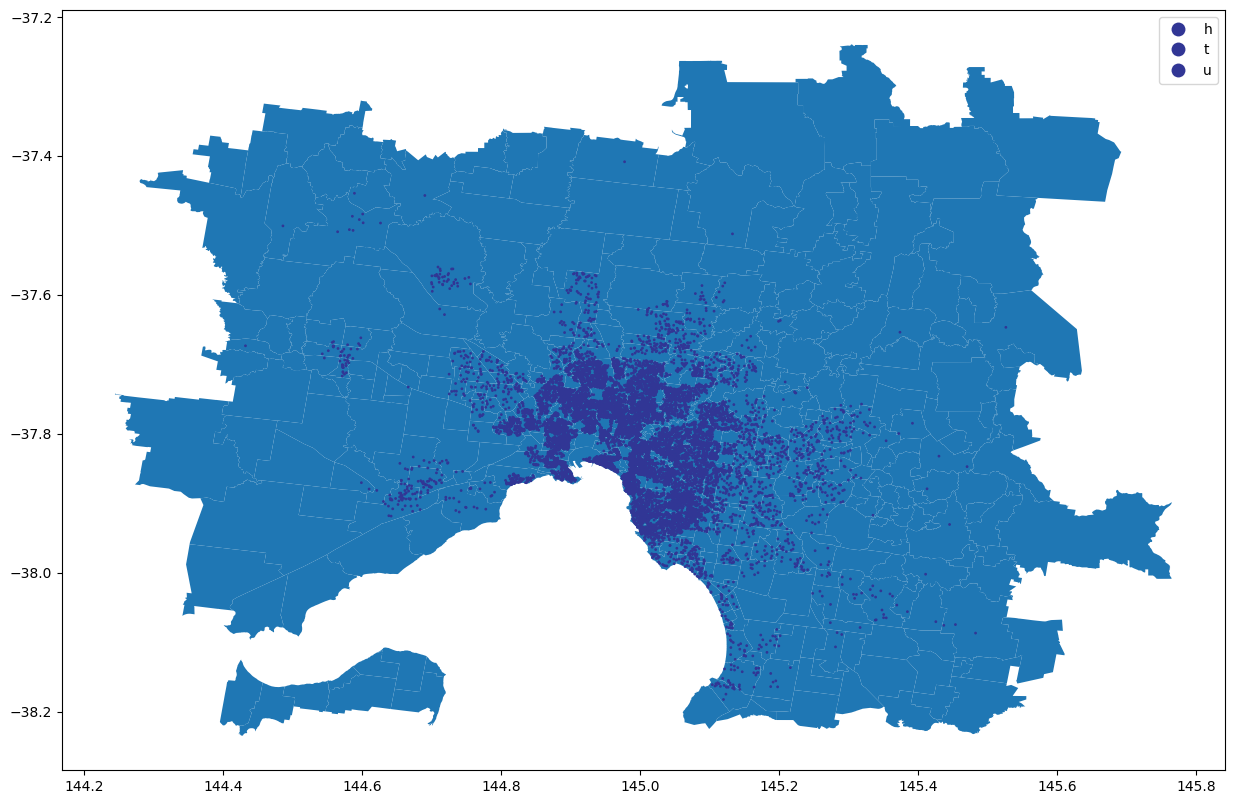

In [3]:
#plot all the property location
geometry = [Point(xy) for xy in zip(df_house['Longtitude'], df_house['Lattitude'])]
gdf = GeoDataFrame(df_house, geometry=geometry)  
#set boundaries
long_max = df_house['Longtitude'].max()
long_min = df_house['Longtitude'].min()
lat_max = df_house['Lattitude'].max()
lat_min = df_house['Lattitude'].min()
# read shapefile
victoria = gpd.read_file('/Users/vanessali/Desktop/Melbourne_house/vic_shape')
mel = victoria.cx[long_min:long_max, lat_min:lat_max]
gdf.plot(column='Type',  cmap='RdYlBu', legend=True, ax=mel.plot(figsize=(15, 11)), marker='o', markersize=1, vmin=-38, vmax=-37)

In [ ]:
### region count

## 2.2. Basic information Property

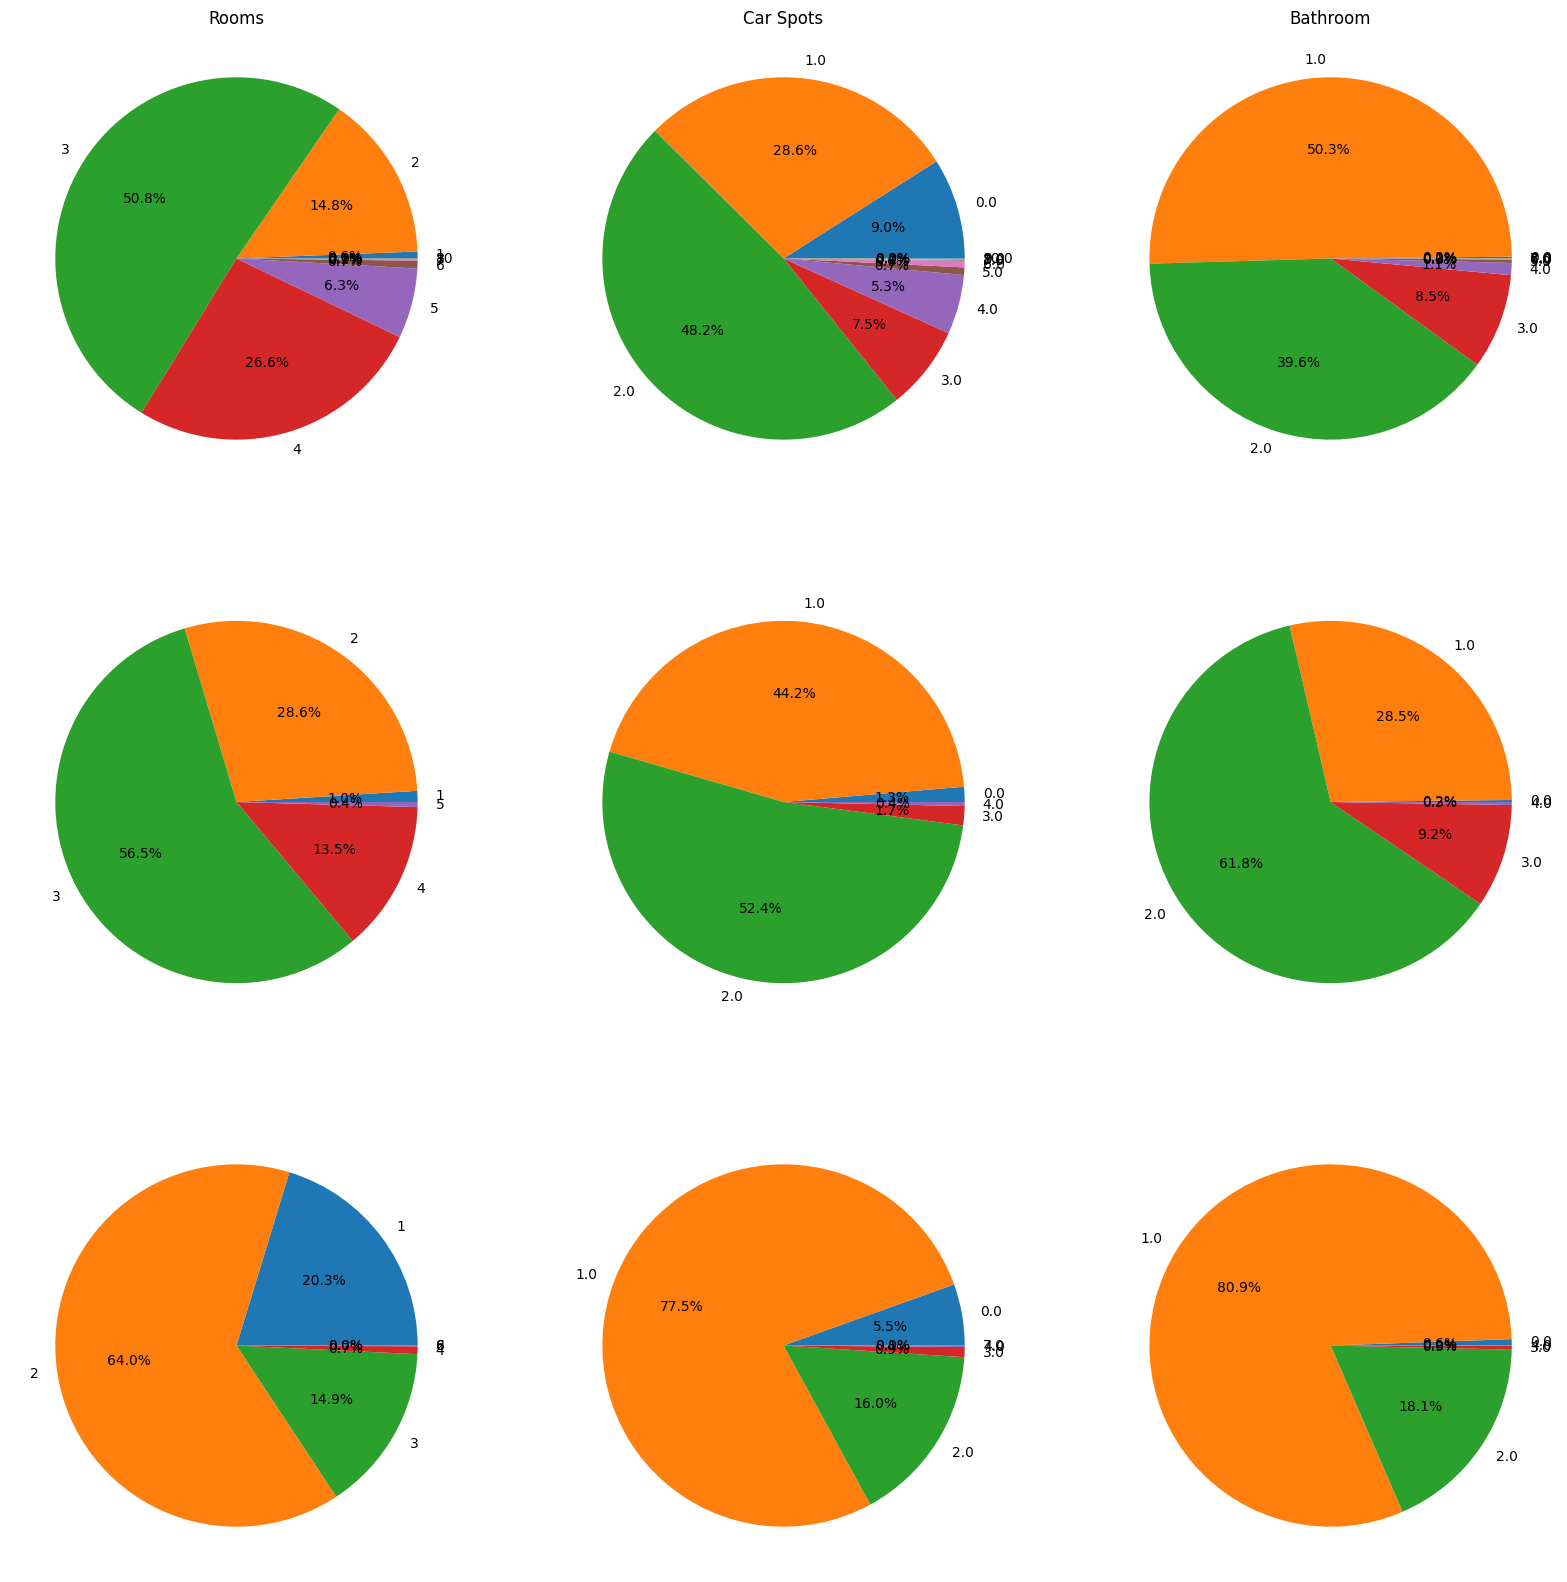

In [26]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
df_house[df_house['Type'] == 'h'].groupby('Rooms').size().plot(kind='pie', autopct='%1.1f%%', ax=axes[0, 0])
df_house[df_house['Type'] == 'h'].groupby('Car').size().plot(kind='pie', autopct='%1.1f%%', ax=axes[0, 1])
df_house[df_house['Type'] == 'h'].groupby('Bathroom').size().plot(kind='pie', autopct='%1.1f%%', ax=axes[0, 2])
df_house[df_house['Type'] == 't'].groupby('Rooms').size().plot(kind='pie', autopct='%1.1f%%', ax=axes[1, 0])
df_house[df_house['Type'] == 't'].groupby('Car').size().plot(kind='pie', autopct='%1.1f%%', ax=axes[1, 1])
df_house[df_house['Type'] == 't'].groupby('Bathroom').size().plot(kind='pie', autopct='%1.1f%%', ax=axes[1, 2])
df_house[df_house['Type'] == 'u'].groupby('Rooms').size().plot(kind='pie', autopct='%1.1f%%', ax=axes[2, 0])
df_house[df_house['Type'] == 'u'].groupby('Car').size().plot(kind='pie', autopct='%1.1f%%', ax=axes[2, 1])
df_house[df_house['Type'] == 'u'].groupby('Bathroom').size().plot(kind='pie', autopct='%1.1f%%', ax=axes[2, 2])

axes[0, 0].set_title("Rooms")
axes[0, 1].set_title("Car Spots")
axes[0, 2].set_title("Bathroom")

plt.show()

### We want to know in different suburb, the distribution of different construction years in different egions

In [56]:
df_house_region=df_house.loc[df_house['Regionname'].str.contains('Metropolitan')]

In [57]:
df_house_region = df_house_region.loc[~df_house_region['YearBuilt'].isnull()]
df_house_region['YearBuilt'].isnull().sum()

0

In [58]:
bins = [1100,1500,1900,1930,1950,1970,1990,2000,2010,2020]
df_house_region['YearBuilt_category'] = pd.cut(df_house_region['YearBuilt'], bins)
df_house_region

Suburb          Address  Rooms Type      Price Method   SellerG  \
1         Abbotsford  25 Bloomburg St      2    h  1035000.0      S    Biggin   
2         Abbotsford     5 Charles St      3    h  1465000.0     SP    Biggin   
4         Abbotsford      55a Park St      4    h  1600000.0     VB    Nelson   
6         Abbotsford     124 Yarra St      3    h  1876000.0      S    Nelson   
7         Abbotsford    98 Charles St      2    h  1636000.0      S    Nelson   
...              ...              ...    ...  ...        ...    ...       ...   
13575  Wheelers Hill     12 Strada Cr      4    h  1245000.0      S     Barry   
13576   Williamstown    77 Merrett Dr      3    h  1031000.0     SP  Williams   
13577   Williamstown      83 Power St      3    h  1170000.0      S     Raine   
13578   Williamstown     96 Verdon St      4    h  2500000.0     PI   Sweeney   
13579     Yarraville       6 Agnes St      4    h  1285000.0     SP   Village   

             Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
1       4/02/2016       2.5    3067.0       2.0       1.0  0.0     156.0   
2       4/03/2017       2.5    3067.0       3.0       2.0  0.0     134.0   
4       4/06/2016       2.5    3067.0       3.0       1.0  2.0     120.0   
6       7/05/2016       2.5    3067.0       4.0       2.0  0.0     245.0   
7       8/10/2016       2.5    3067.0       2.0       1.0  2.0     256.0   
...           ...       ...       ...       ...       ...  ...       ...   
13575  26/08/2017      16.7    3150.0       4.0       2.0  2.0     652.0   
13576  26/08/2017       6.8    3016.0       3.0       2.0  2.0     333.0   
13577  26/08/2017       6.8    3016.0       3.0       2.0  4.0     436.0   
13578  26/08/2017       6.8    3016.0       4.0       1.0  5.0     866.0   
13579  26/08/2017       6.3    3013.0       4.0       1.0  1.0     362.0   

       BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
1              79.0     1900.0       Yarra  -37.80790   144.99340   
2             150.0     1900.0       Yarra  -37.80930   144.99440   
4             142.0     2014.0       Yarra  -37.80720   144.99410   
6             210.0     1910.0       Yarra  -37.80240   144.99930   
7             107.0     1890.0       Yarra  -37.80600   144.99540   
...             ...        ...         ...        ...         ...   
13575           NaN     1981.0         NaN  -37.90562   145.16761   
13576         133.0     1995.0         NaN  -37.85927   144.87904   
13577           NaN     1997.0         NaN  -37.85274   144.88738   
13578         157.0     1920.0         NaN  -37.85908   144.89299   
13579         112.0     1920.0         NaN  -37.81188   144.88449   

                       Regionname  Propertycount YearBuilt_category  
1           Northern Metropolitan         4019.0       (1500, 1900]  
2           Northern Metropolitan         4019.0       (1500, 1900]  
4           Northern Metropolitan         4019.0       (2010, 2020]  
6           Northern Metropolitan         4019.0       (1900, 1930]  
7           Northern Metropolitan         4019.0       (1500, 1900]  
...                           ...            ...                ...  
13575  South-Eastern Metropolitan         7392.0       (1970, 1990]  
13576        Western Metropolitan         6380.0       (1990, 2000]  
13577        Western Metropolitan         6380.0       (1990, 2000]  
13578        Western Metropolitan         6380.0       (1900, 1930]  
13579        Western Metropolitan         6543.0       (1900, 1930]  

[8124 rows x 22 columns]

In [59]:
df_house_region_agg = df_house_region.groupby(['Regionname','Suburb','Type','YearBuilt_category']).agg(year_built_count = ('YearBuilt_category','count')).reset_index()

In [60]:
# pd.set_option('display.max_rows', None) 
df_house_region_agg.head(10)

Regionname      Suburb Type YearBuilt_category  year_built_count
0  Eastern Metropolitan  Abbotsford    h       (1100, 1500]                 0
1  Eastern Metropolitan  Abbotsford    h       (1500, 1900]                 0
2  Eastern Metropolitan  Abbotsford    h       (1900, 1930]                 0
3  Eastern Metropolitan  Abbotsford    h       (1930, 1950]                 0
4  Eastern Metropolitan  Abbotsford    h       (1950, 1970]                 0
5  Eastern Metropolitan  Abbotsford    h       (1970, 1990]                 0
6  Eastern Metropolitan  Abbotsford    h       (1990, 2000]                 0
7  Eastern Metropolitan  Abbotsford    h       (2000, 2010]                 0
8  Eastern Metropolitan  Abbotsford    h       (2010, 2020]                 0
9  Eastern Metropolitan  Abbotsford    t       (1100, 1500]                 0

In [61]:
df_house_region_agg = df_house_region_agg[df_house_region_agg['year_built_count'] != 0]
df_house_region_agg.head(100)

Regionname     Suburb Type YearBuilt_category  \
544   Eastern Metropolitan  Bayswater    h       (1950, 1970]   
545   Eastern Metropolitan  Bayswater    h       (1970, 1990]   
553   Eastern Metropolitan  Bayswater    t       (1950, 1970]   
556   Eastern Metropolitan  Bayswater    t       (2000, 2010]   
562   Eastern Metropolitan  Bayswater    u       (1950, 1970]   
...                    ...        ...  ...                ...   
2527  Eastern Metropolitan    Donvale    t       (2000, 2010]   
2533  Eastern Metropolitan    Donvale    u       (1950, 1970]   
2567  Eastern Metropolitan  Eaglemont    h       (1900, 1930]   
2568  Eastern Metropolitan  Eaglemont    h       (1930, 1950]   
2569  Eastern Metropolitan  Eaglemont    h       (1950, 1970]   

      year_built_count  
544                  3  
545                  3  
553                  1  
556                  1  
562                  1  
...                ...  
2527                 1  
2533                 1  
2567                 3  
2568                 5  
2569                 6  

[100 rows x 5 columns]

In [62]:
stacked_eastern = df_house_region_agg.loc[(df_house_region_agg['Regionname'] == 'Eastern Metropolitan')& (df_house_region_agg['Type'] == 'h')]
suburb=stacked_eastern['Suburb'].unique()
stacked_eastern

Regionname           Suburb Type YearBuilt_category  \
544   Eastern Metropolitan        Bayswater    h       (1950, 1970]   
545   Eastern Metropolitan        Bayswater    h       (1970, 1990]   
572   Eastern Metropolitan  Bayswater North    h       (1970, 1990]   
573   Eastern Metropolitan  Bayswater North    h       (1990, 2000]   
624   Eastern Metropolitan        Bellfield    h       (1930, 1950]   
...                    ...              ...  ...                ...   
6971  Eastern Metropolitan   Wantirna South    h       (1970, 1990]   
6972  Eastern Metropolitan   Wantirna South    h       (1990, 2000]   
6973  Eastern Metropolitan   Wantirna South    h       (2000, 2010]   
6974  Eastern Metropolitan   Wantirna South    h       (2010, 2020]   
6998  Eastern Metropolitan       Warrandyte    h       (1970, 1990]   

      year_built_count  
544                  3  
545                  3  
572                  3  
573                  1  
624                  3  
...                ...  
6971                 5  
6972                 2  
6973                 1  
6974                 1  
6998                 1  

[177 rows x 5 columns]

In [ ]:
for i in suburb:
    

## 2.3 Price

### Q2.3.1 What is the main feature that affect the house price?

In [25]:
#property type, location, room number, 研究不同的关系，不同的因素对房价的影响,地区均价分布

#### 2.3.1.1 Distance

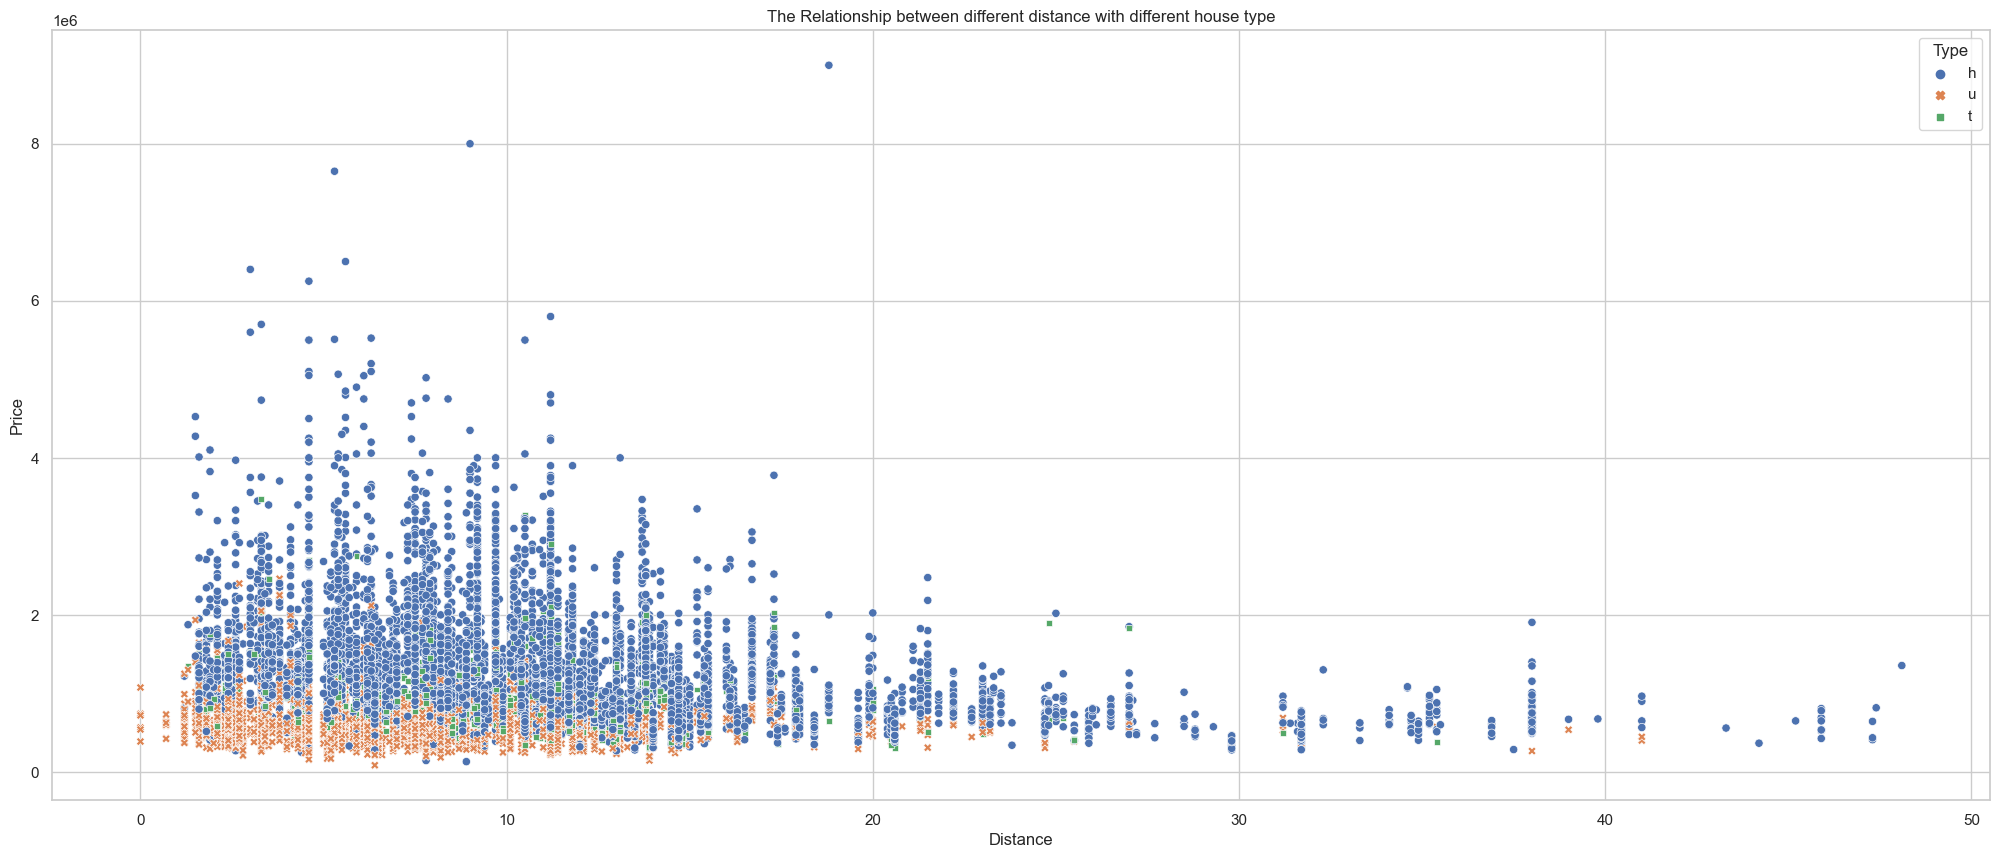

In [167]:
fig, ax = plt.subplots(figsize=(25,10))
sns.scatterplot(data=df_house, x="Distance", y="Price",hue="Type", style="Type",legend=True)   
plt.title('The Relationship between different distance with different house type')
plt.show()

#### This figure didn't not illustrate the relation between distance from the CBD and house prices very well, as they do not have a linear relationship. For example, within the 5-10km range, the prices of different houses is vary huge, ranging from 1.5 million to 9 million. The information that can be inferred from this figure is most people prefer to choose houses within 20km of the city central, and there is a significant price difference between townhouses, units, and houses. House is much expensive than the others.

### For gaining a more comprehensive understanding, we need to consider additional factors:


#### (1) Region

In [168]:
median_prices = df_house.groupby(['Regionname', 'Type']).agg({'Price':np.median})
df_median_prices = pd.DataFrame(median_prices).reset_index()

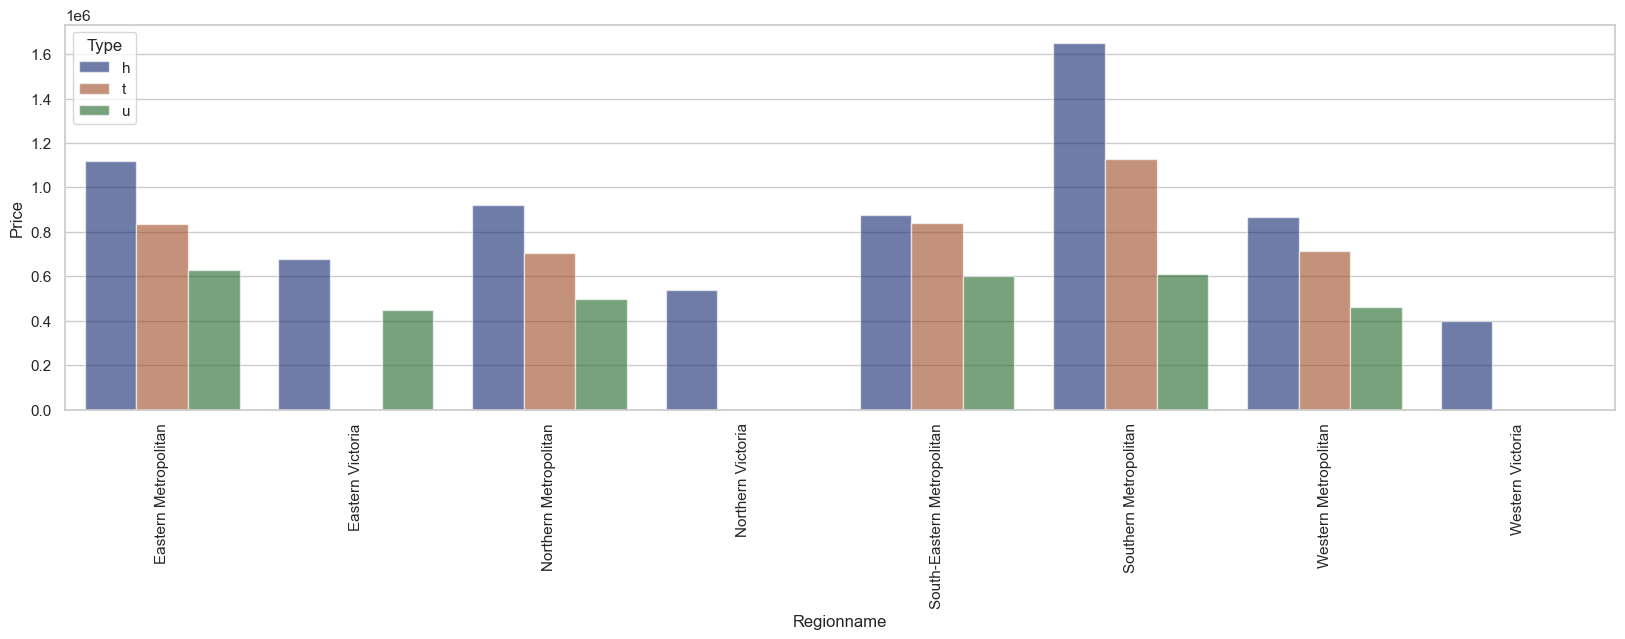

In [210]:
##region
fig, ax = plt.subplots(figsize=(20,5))
sns.set_theme(style="whitegrid")
sns.barplot(x='Regionname',y='Price',
            data=df_median_prices, 
            hue='Type',
            errorbar="sd", 
            palette="dark", 
            alpha=.6,ax=ax) 
            # height=6, aspect=2)
plt.xticks(rotation=90)
# ax.legend.set_title("House Type")
# ax.set_title('Relationship between Region and Price')
plt.show()


#### Region+Suburb+Distance

In [57]:
##region+suburb
df_region_sub_price = df_house.groupby(['Regionname', 'Suburb','Type']).agg({'Distance': np.median, 'Price': np.median}).reset_index()
bins = [0, 10, 20, 30, 40, 50]
df_region_sub_price['Dis_category'] = pd.cut(df_region_sub_price['Distance'], bins)
df_region_sub_price

Regionname           Suburb Type  Distance     Price  \
0    Eastern Metropolitan        Bayswater    h      23.2  789500.0   
1    Eastern Metropolitan        Bayswater    t      23.2  750000.0   
2    Eastern Metropolitan        Bayswater    u      23.2  520000.0   
3    Eastern Metropolitan  Bayswater North    h      23.2  743000.0   
4    Eastern Metropolitan  Bayswater North    u      23.2  600000.0   
..                    ...              ...  ...       ...       ...   
685  Western Metropolitan       Yarraville    u       7.0  460250.0   
686      Western Victoria    Bacchus Marsh    h      37.5  285000.0   
687      Western Victoria       Brookfield    h      29.8  456000.0   
688      Western Victoria           Melton    h      31.7  412500.0   
689      Western Victoria     Melton South    h      29.8  390000.0   

    Dis_category  
0       (20, 30]  
1       (20, 30]  
2       (20, 30]  
3       (20, 30]  
4       (20, 30]  
..           ...  
685      (0, 10]  
686     (30, 40]  
687     (20, 30]  
688     (30, 40]  
689     (20, 30]  

[690 rows x 6 columns]

In [207]:
def makeplot_disprice(x):
    # fig, ax = plt.subplots(figsize=(25,10))
    sns.relplot(x='Suburb', 
                y='Price', 
                data=x, 
                hue="Dis_category", size="Dis_category", sizes=(20, 200), legend="full", row='Type', alpha=.5, height=3, aspect=6).set(title=i)
    plt.xticks(rotation=90)
    plt.show()

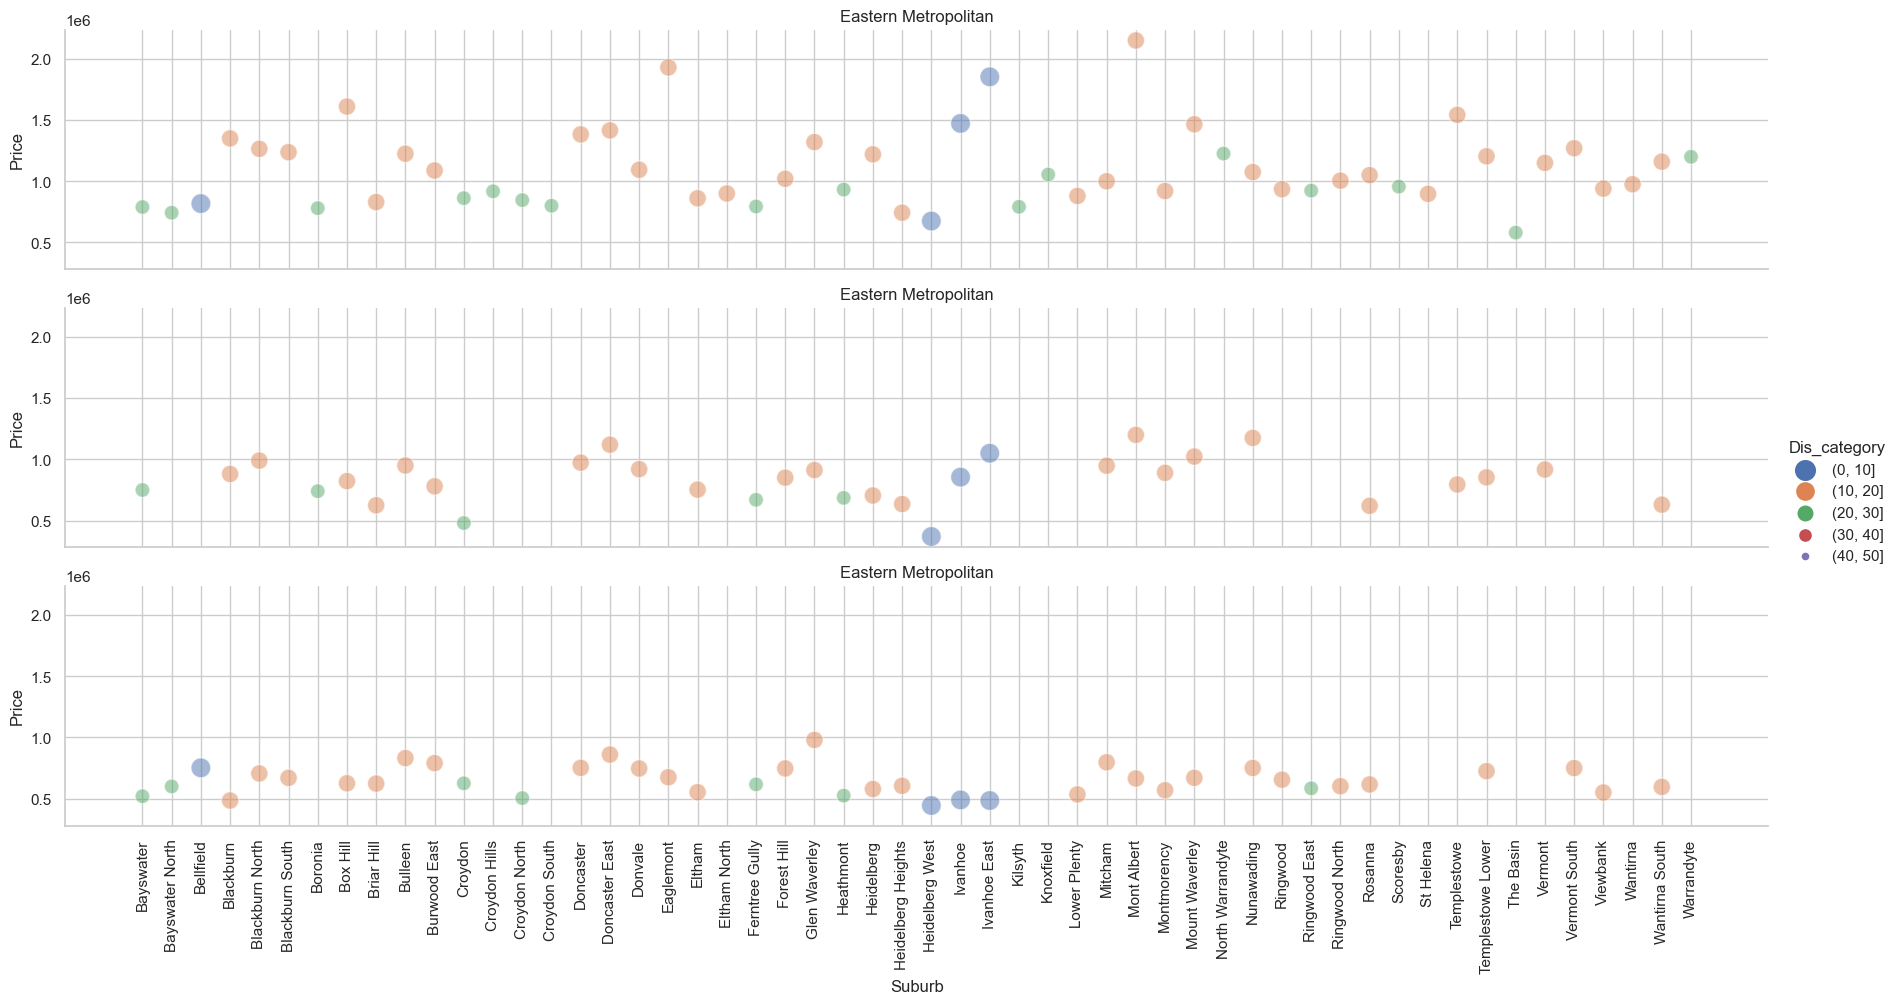

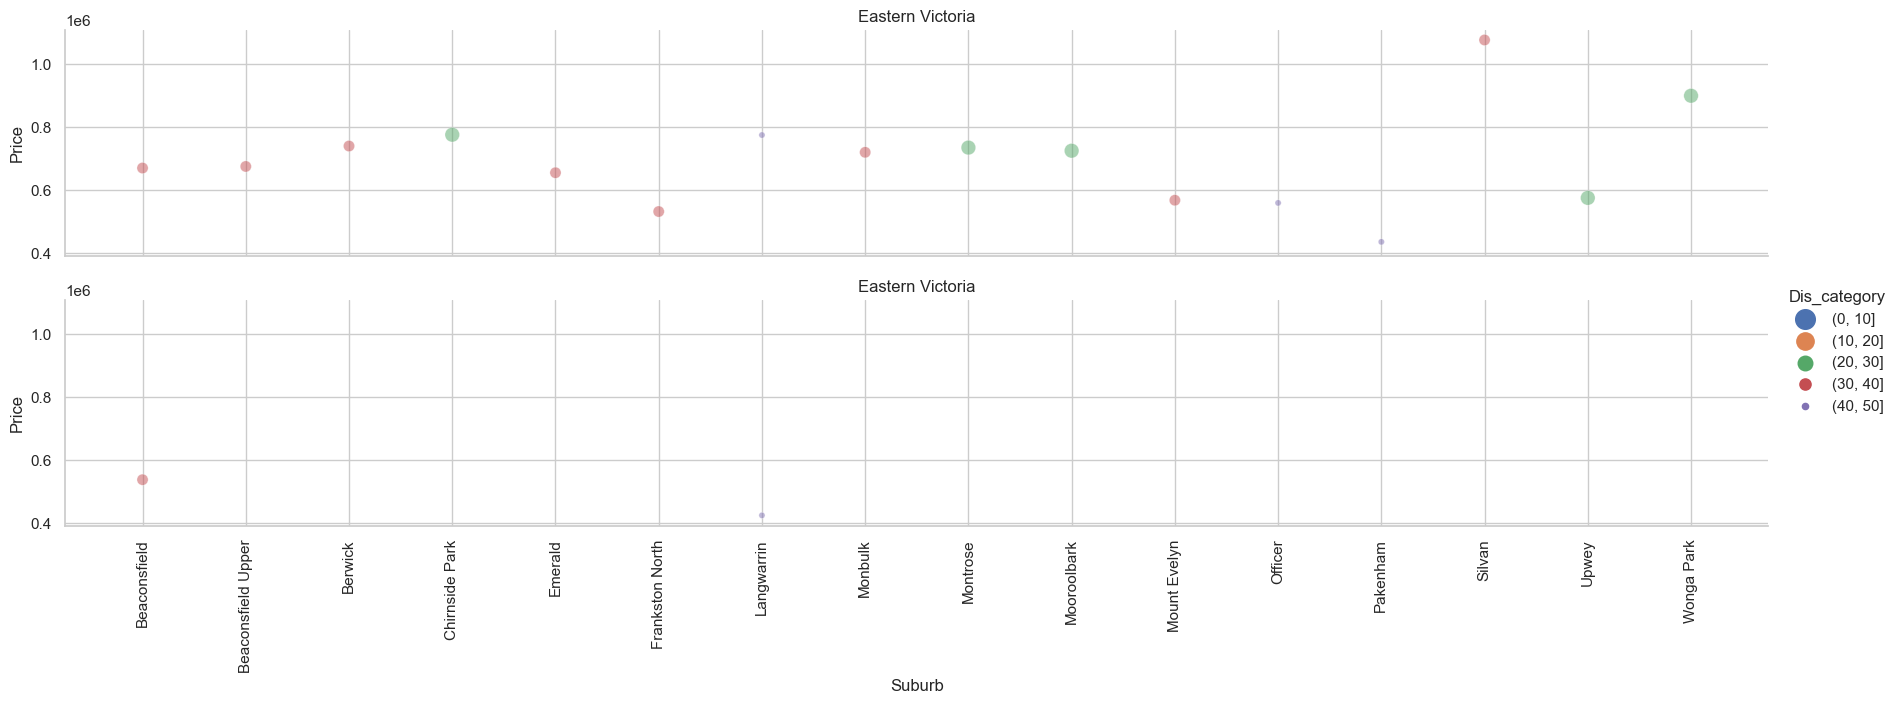

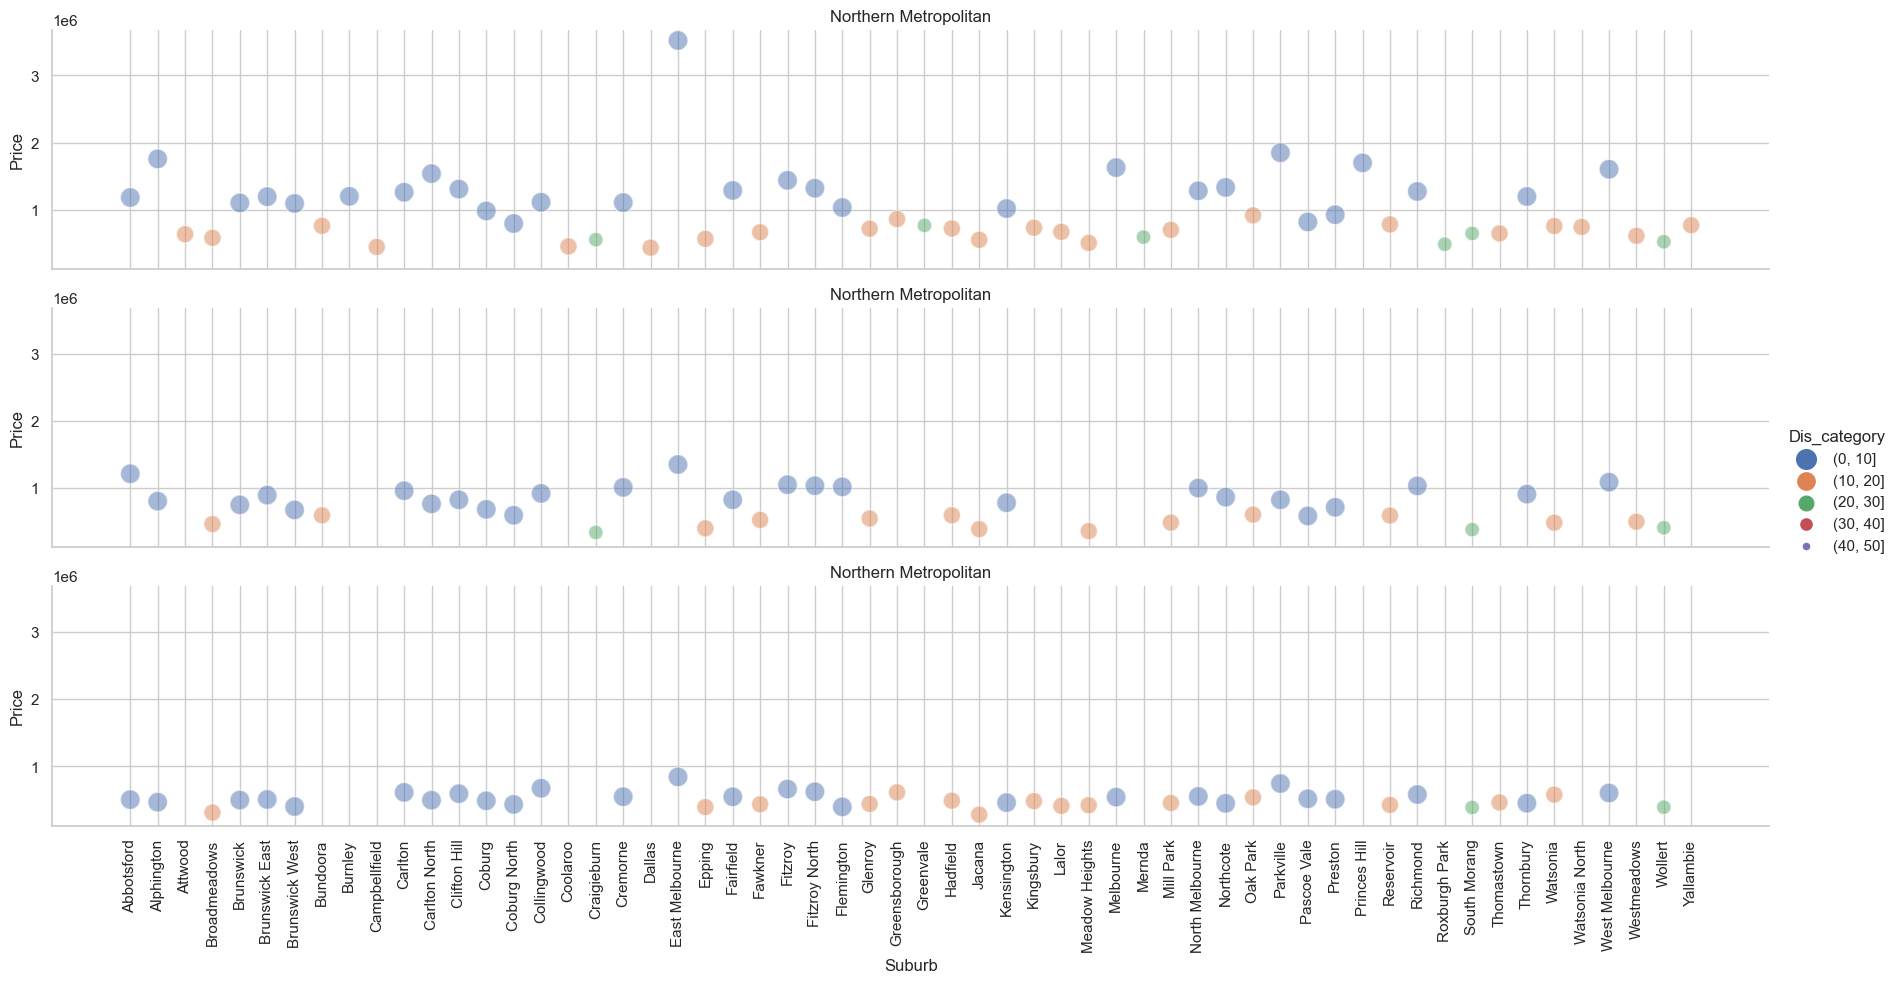

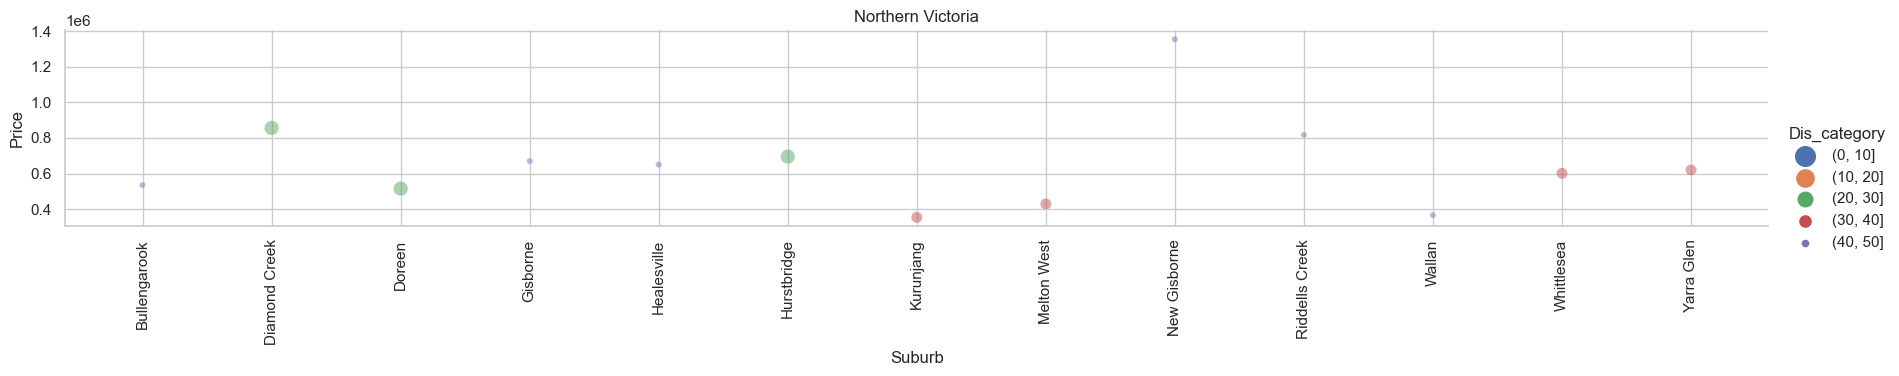

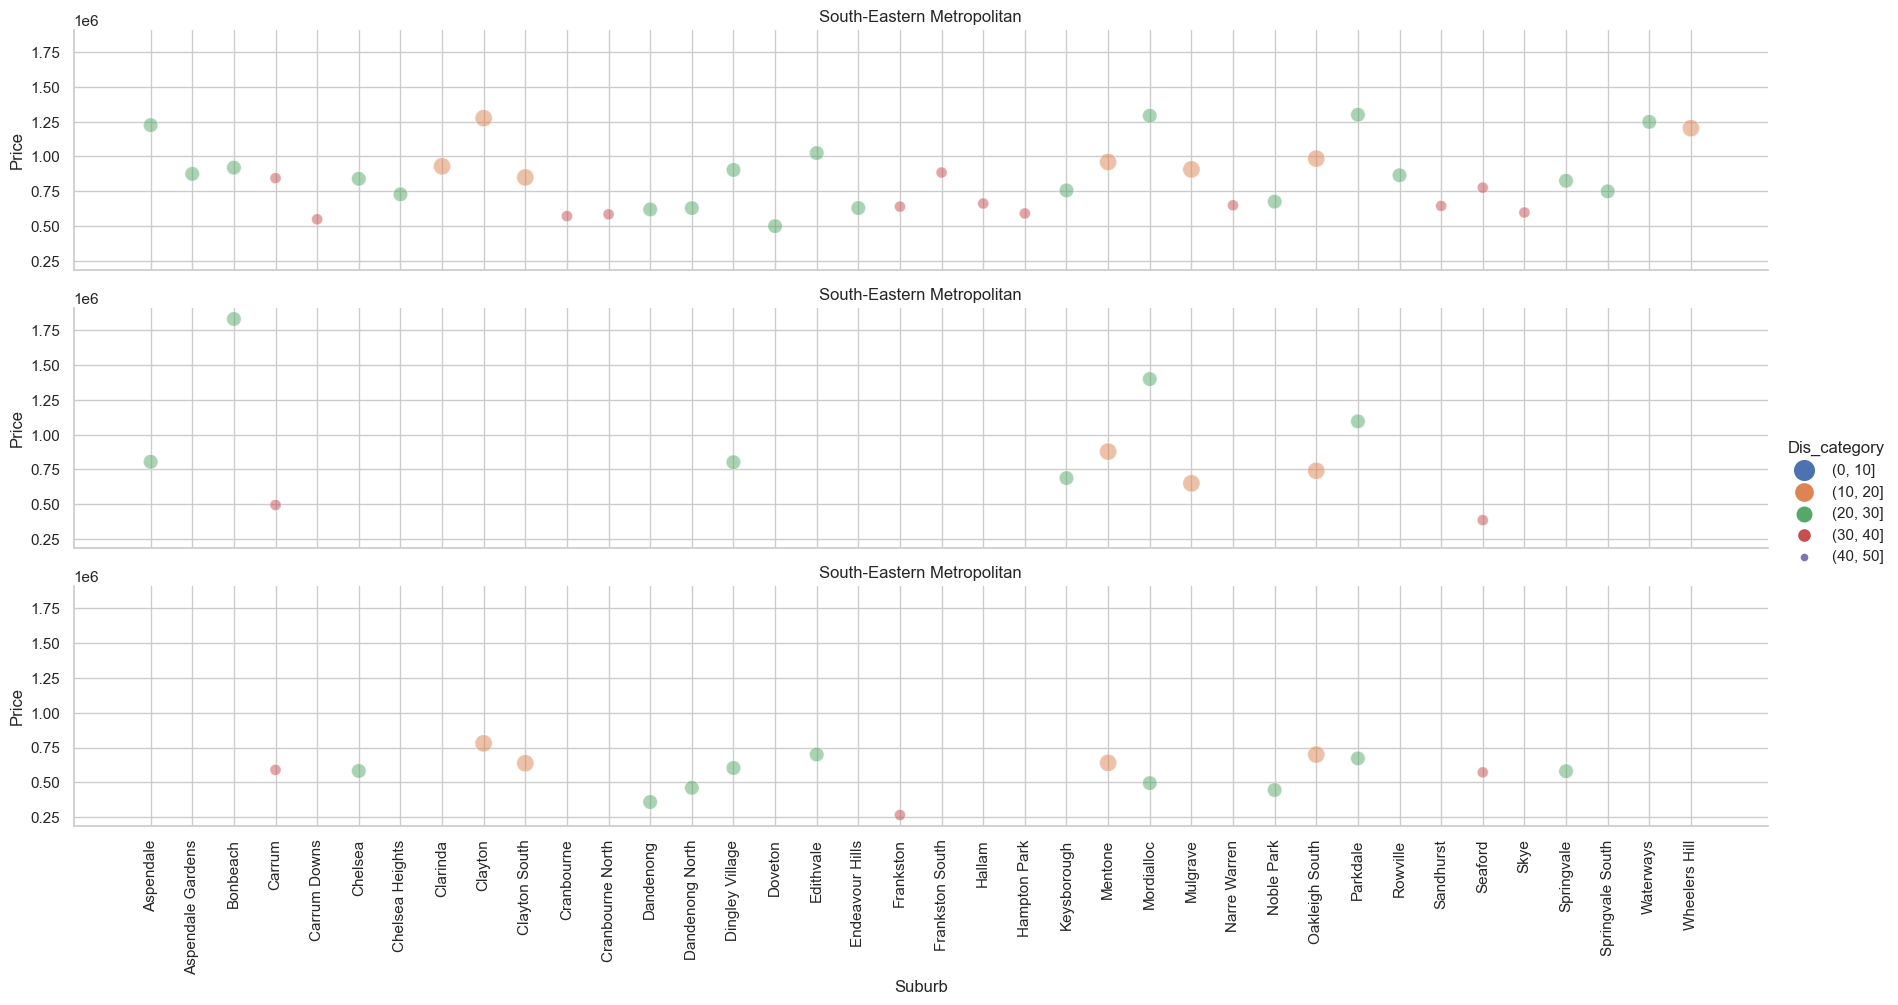

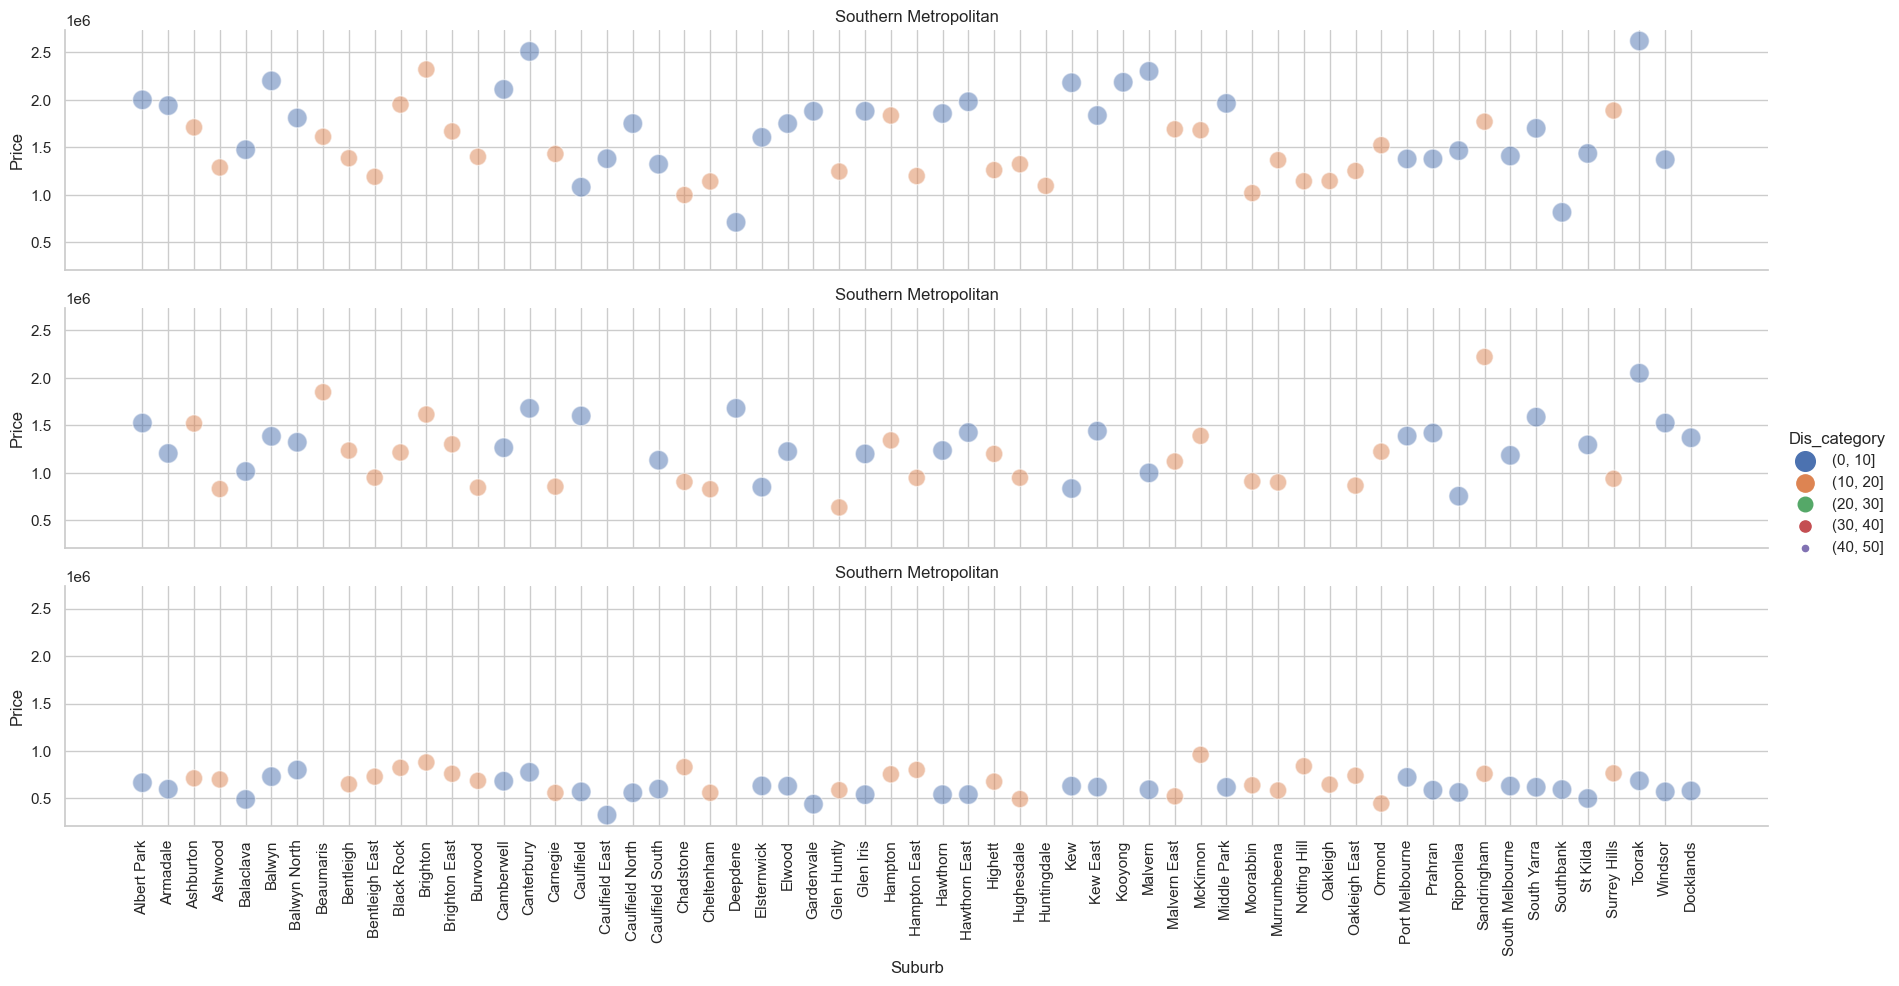

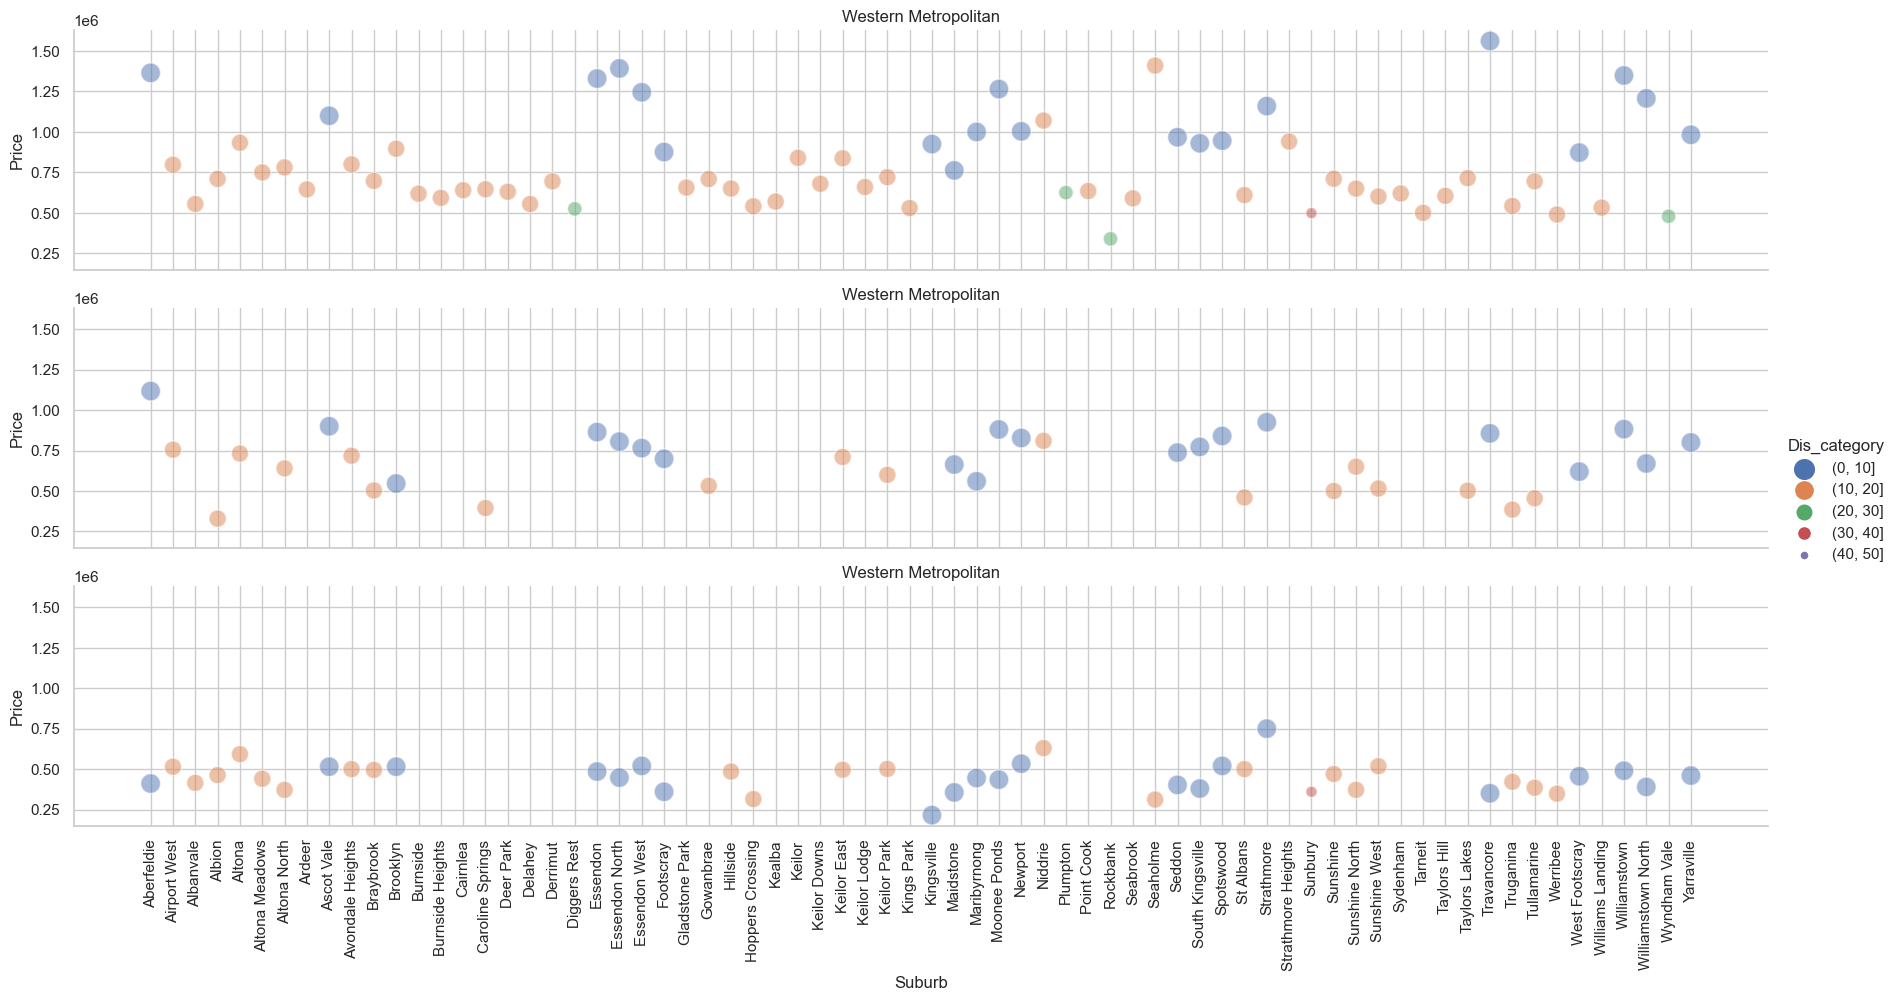

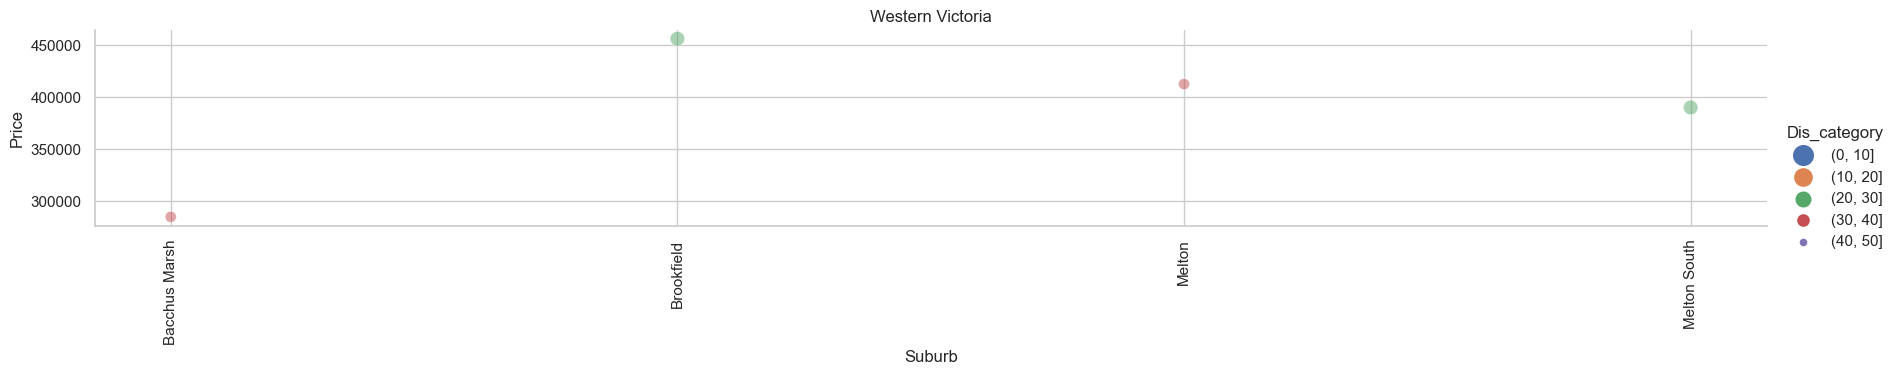

In [208]:
for i in df_region_sub_price['Regionname'].unique():
     makeplot_disprice(df_region_sub_price[df_region_sub_price['Regionname'] == i])

#### Explain
#### After extracting the median prices for different house types in each region and suburb, we found that the distance to the CBD does not have a significant impact on house prices when the distance is within 20 kilometers. However, for properties located more than 30 kilometers away from the CBD, the prices are lower compared to the former. Among the four factors we have studied (region, suburb, distance, and house type), suburb and house type are the top two factors influencing house prices. From the figure, we can observe that in each suburb, the price ranking is as follows: house, townhouse, unit. Regarding the region, we can see that the highest prices are found in the Southern Metropolitan region. The suburbs with an average house price ranging from 2 to 2.5 million dollars in this region include Camberwell, Canterbury, Kew, Kooyong, Malvern, and Toorak. This demonstrates that even within the same region, different suburbs still exhibit significant price variations. The Northern Metropolitan and Western Metropolitan regions are the only two regions where most houses within a 10-kilometer radius perform better than those in the 10-20 kilometer range. Additionally, the average prices in these two regions are lower compared to the South and East regions, indicating that regions with lower average prices are more influenced by the distance from the CBD. Interestingly, the South-East Metropolitan region is the only area in Greater Melbourne where house prices are completely not affected by the distance to the CBD.

In [ ]:
###bullet point

### 2.3.1.2 room number + region + price

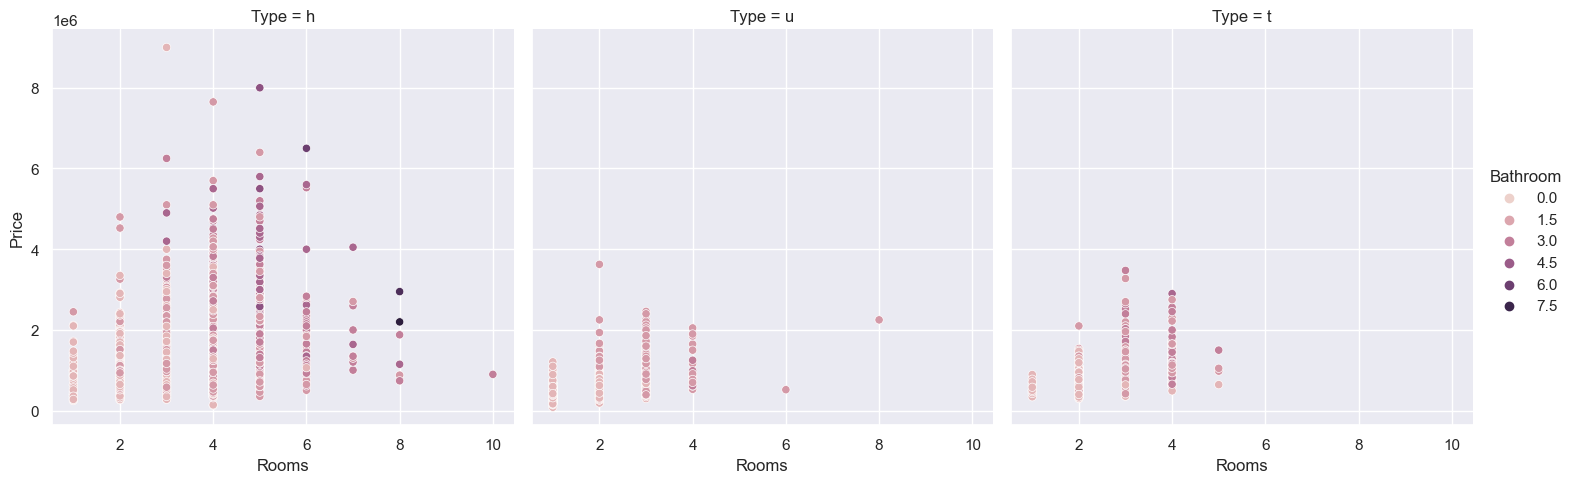

In [252]:
sns.relplot(x='Rooms',y='Price',data=df_house,kind='scatter',hue='Bathroom', col='Type',legend=True)

In [9]:
df_room_sub_price = df_house.groupby(['Regionname','Suburb','Type','Rooms']).agg({'Price':np.median}).reset_index()
df_room_sub_price

Regionname        Suburb Type  Rooms     Price
0     Eastern Metropolitan     Bayswater    h      3  720000.0
1     Eastern Metropolitan     Bayswater    h      4  925000.0
2     Eastern Metropolitan     Bayswater    h      5  915000.0
3     Eastern Metropolitan     Bayswater    t      3  640000.0
4     Eastern Metropolitan     Bayswater    t      4  860000.0
...                    ...           ...  ...    ...       ...
1752      Western Victoria        Melton    h      4  405000.0
1753      Western Victoria        Melton    h      5  585000.0
1754      Western Victoria  Melton South    h      2  280500.0
1755      Western Victoria  Melton South    h      3  395000.0
1756      Western Victoria  Melton South    h      4  382500.0

[1757 rows x 5 columns]

In [10]:
def get_pricerooms(x):
    fig, ax = plt.subplots(figsize=(30,5))
    sns.barplot(x='Suburb', y='Price', 
                data=x, 
                hue='Rooms', alpha=.5,errorbar=None).set(title=i)
    plt.xticks(rotation=90)
    plt.show()
    sns.set_theme(style="darkgrid")


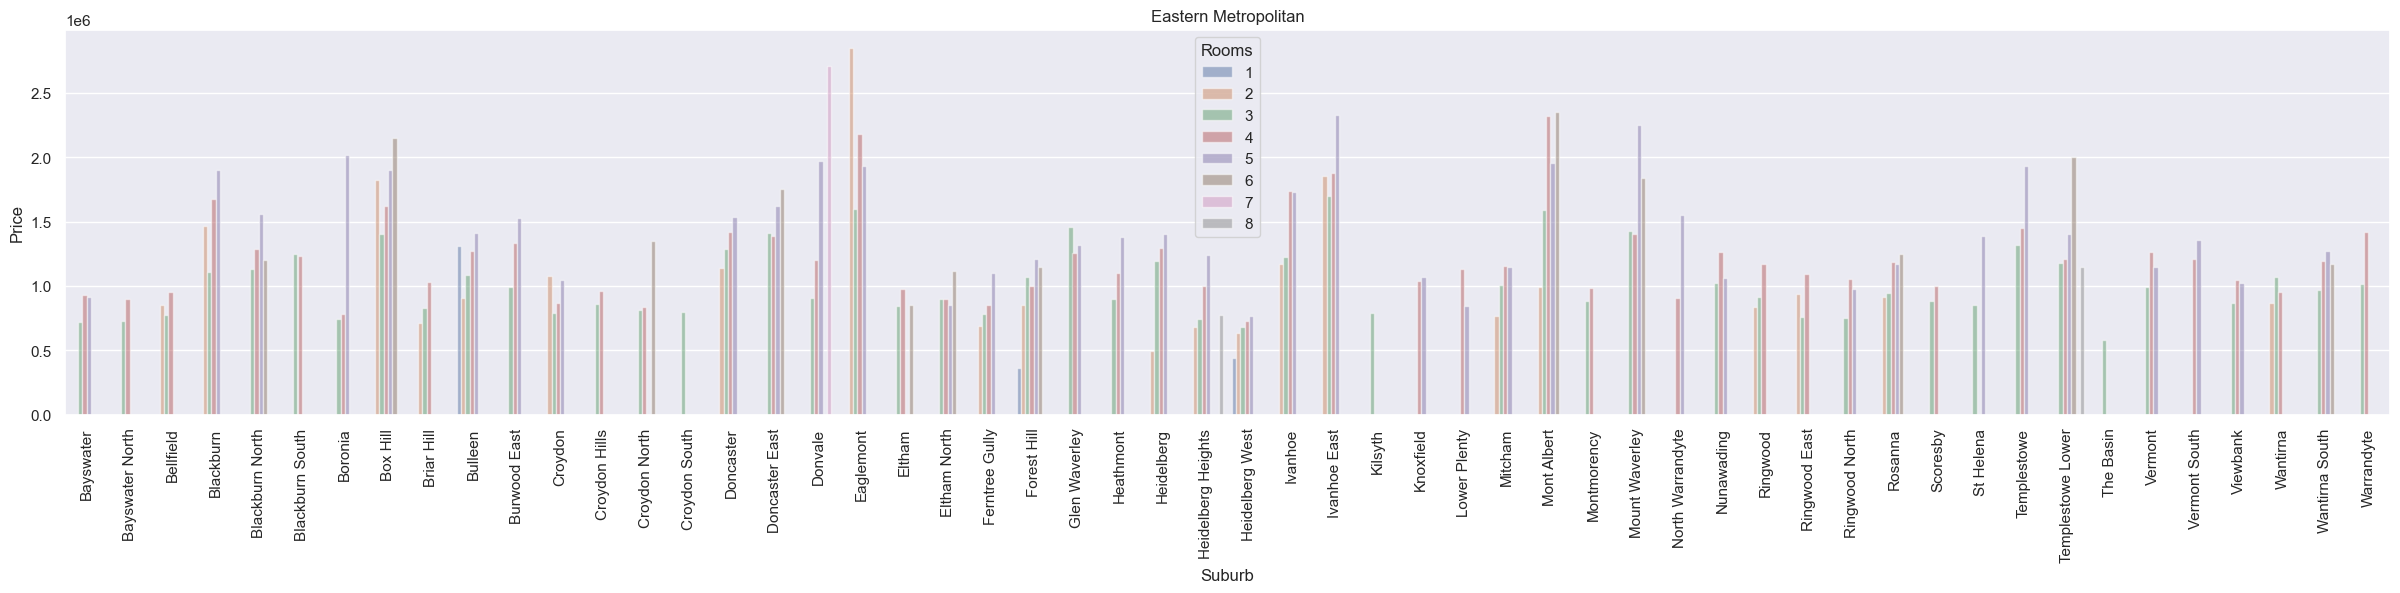

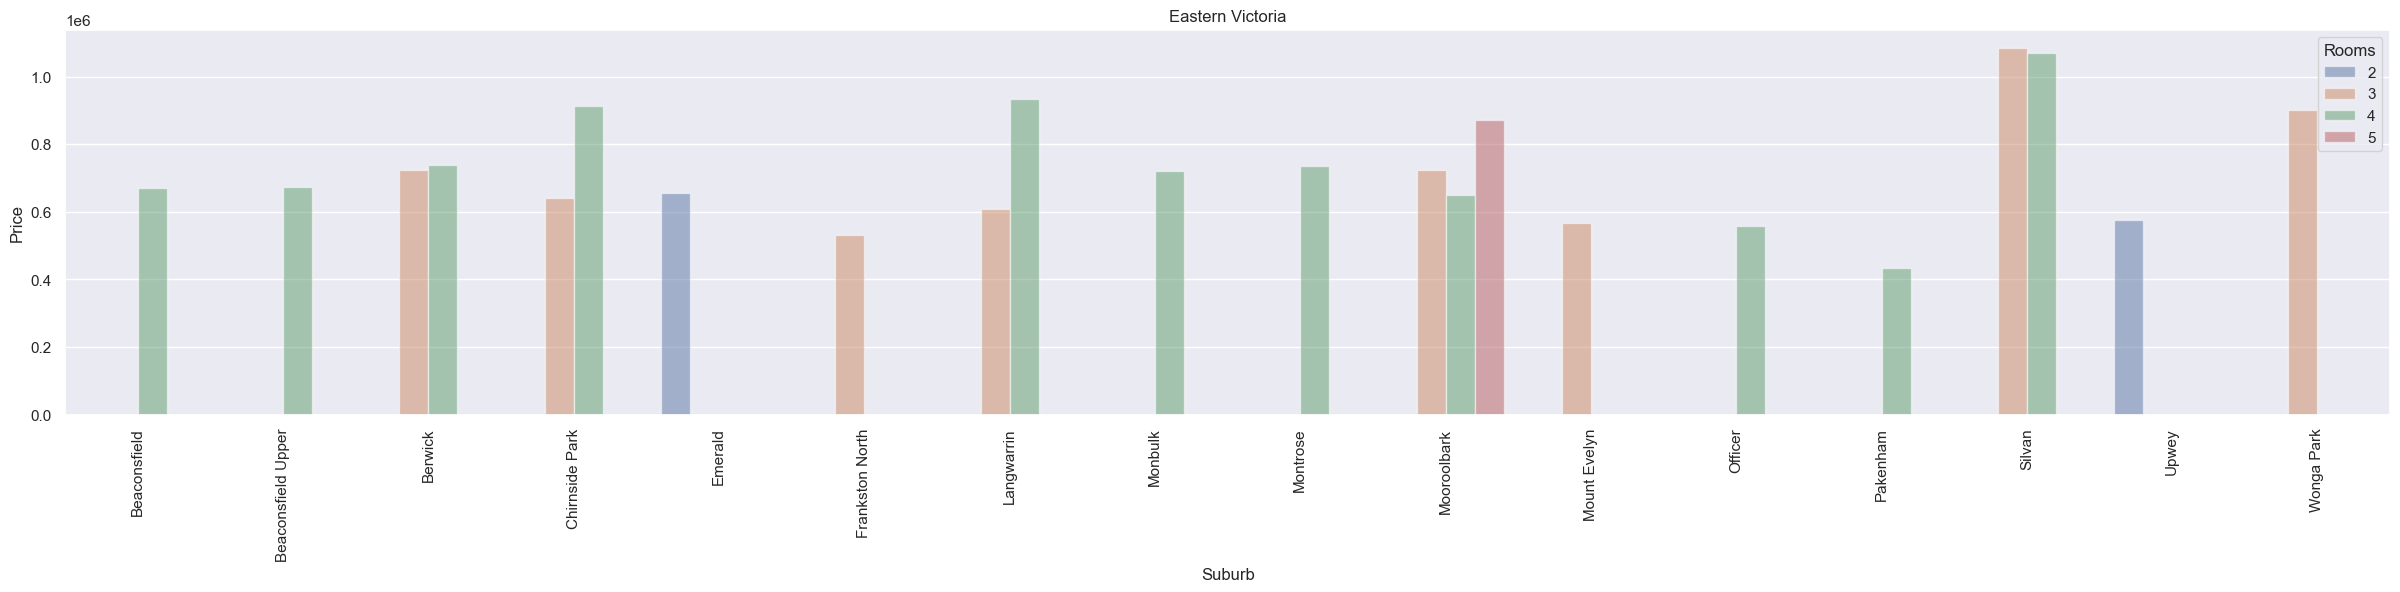

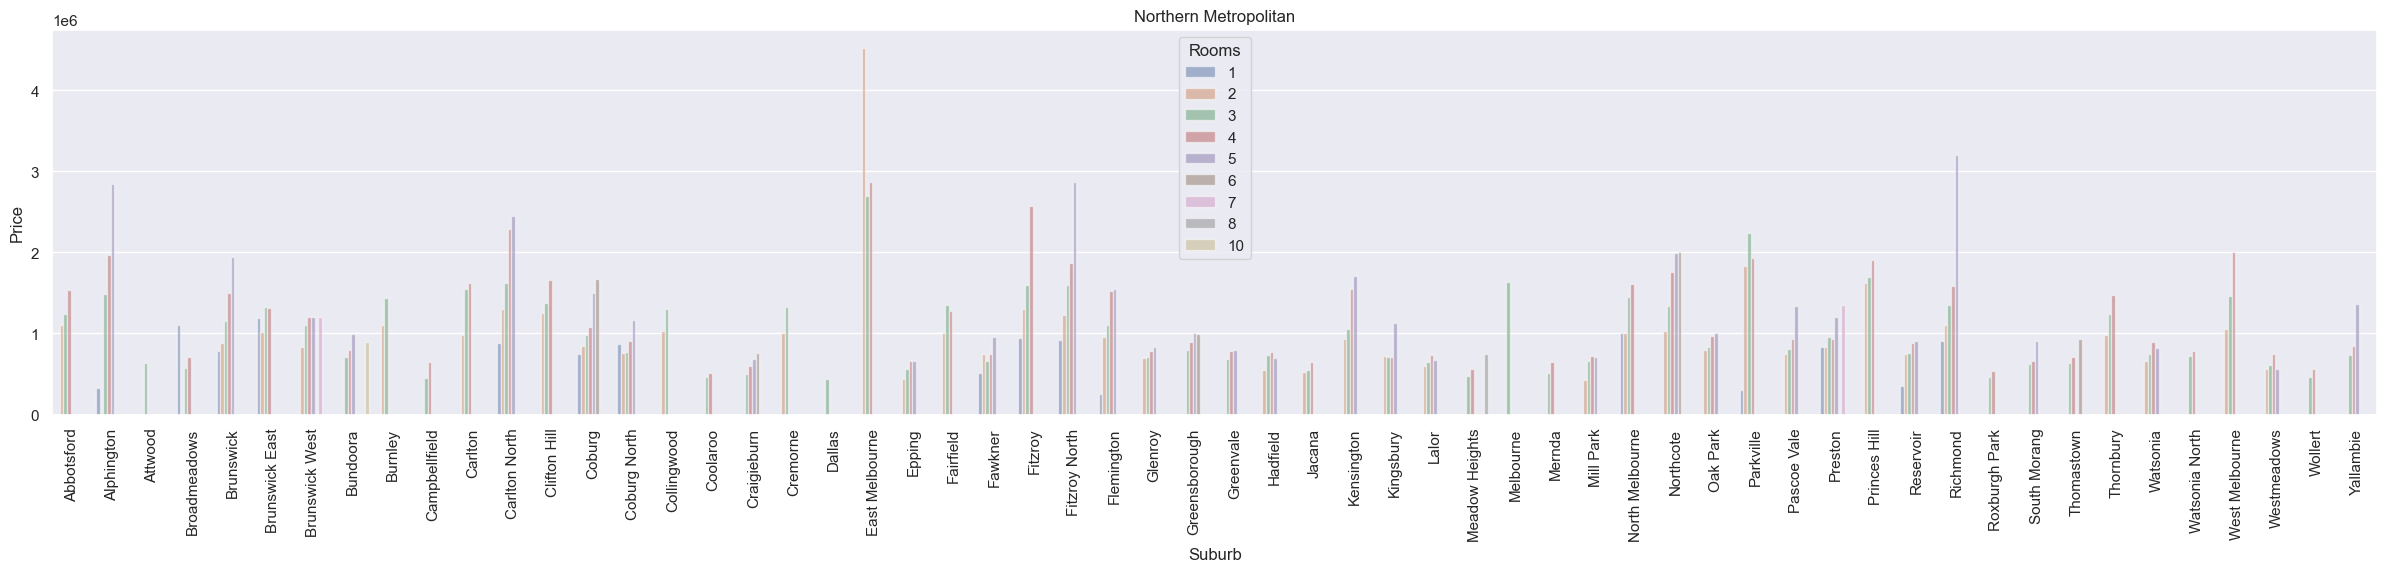

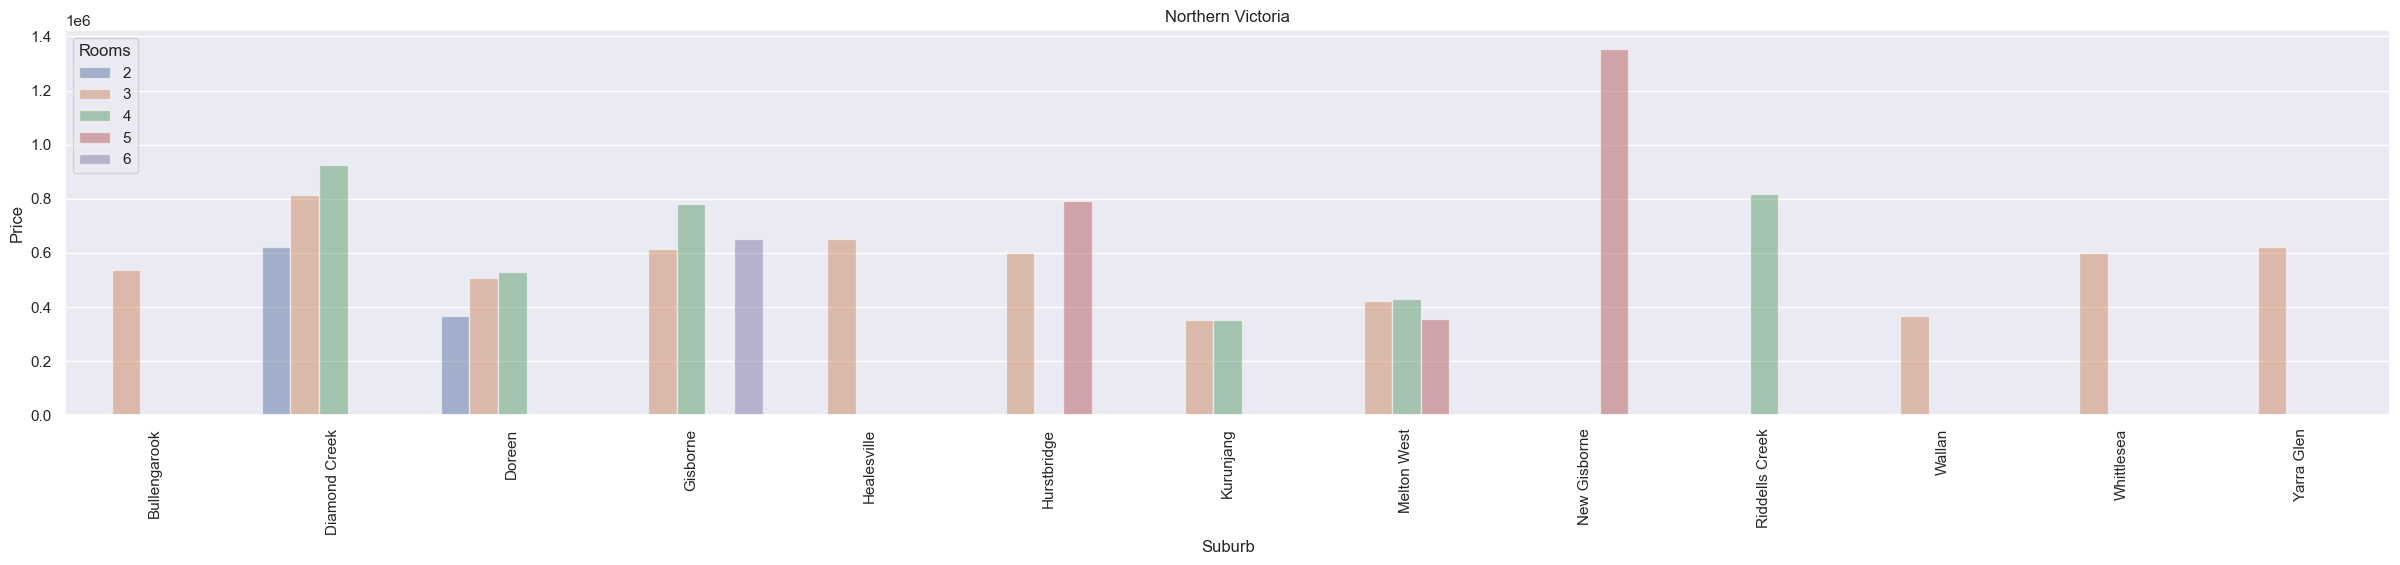

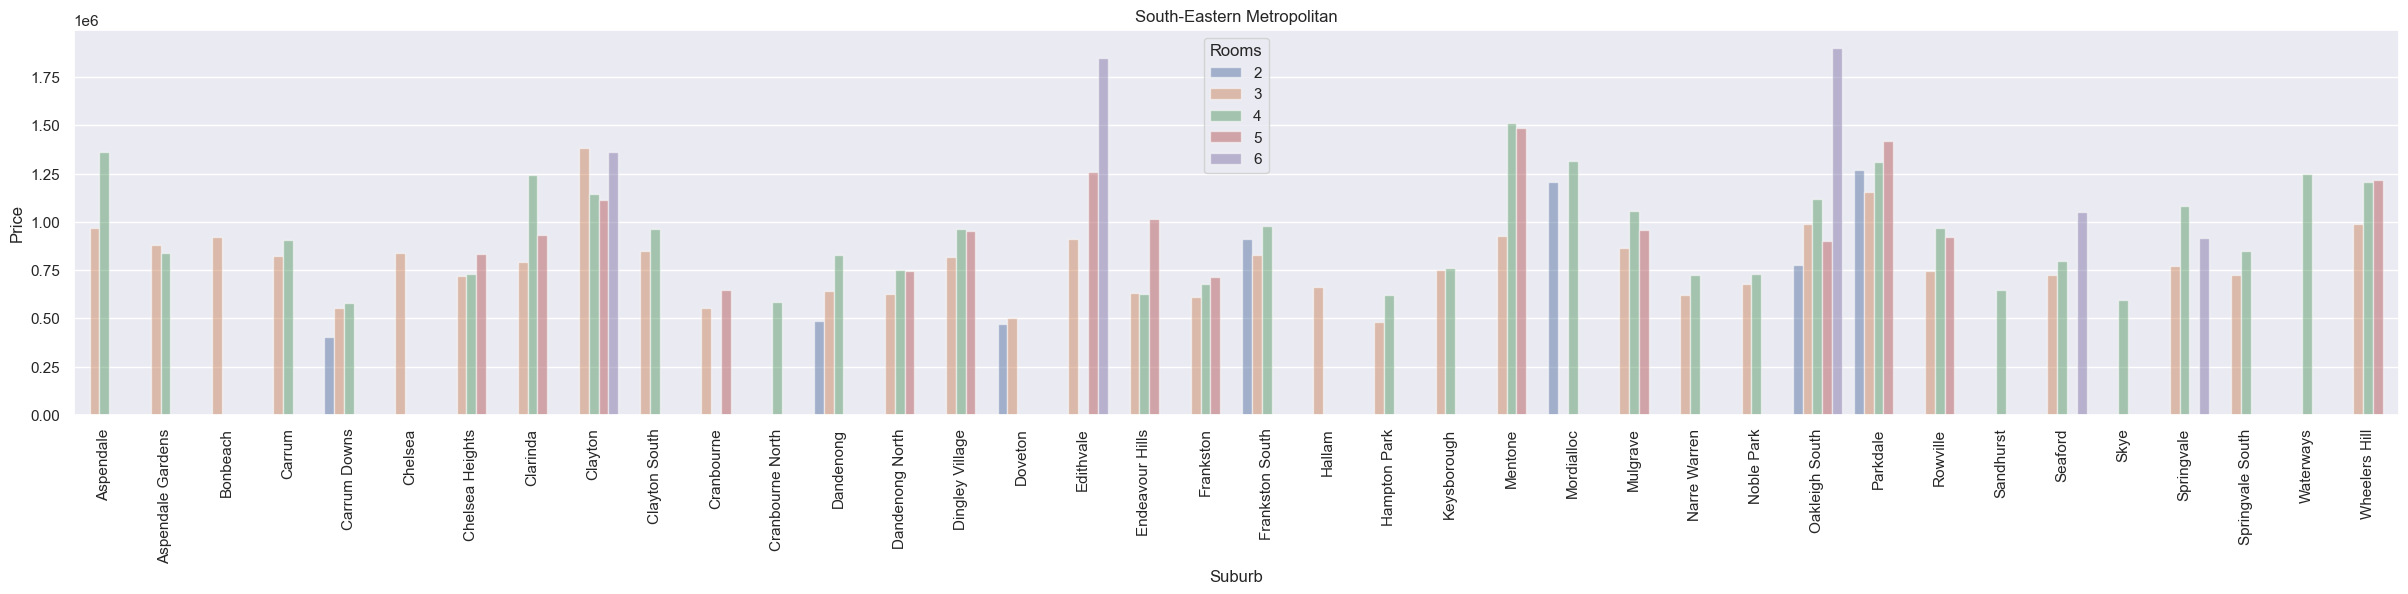

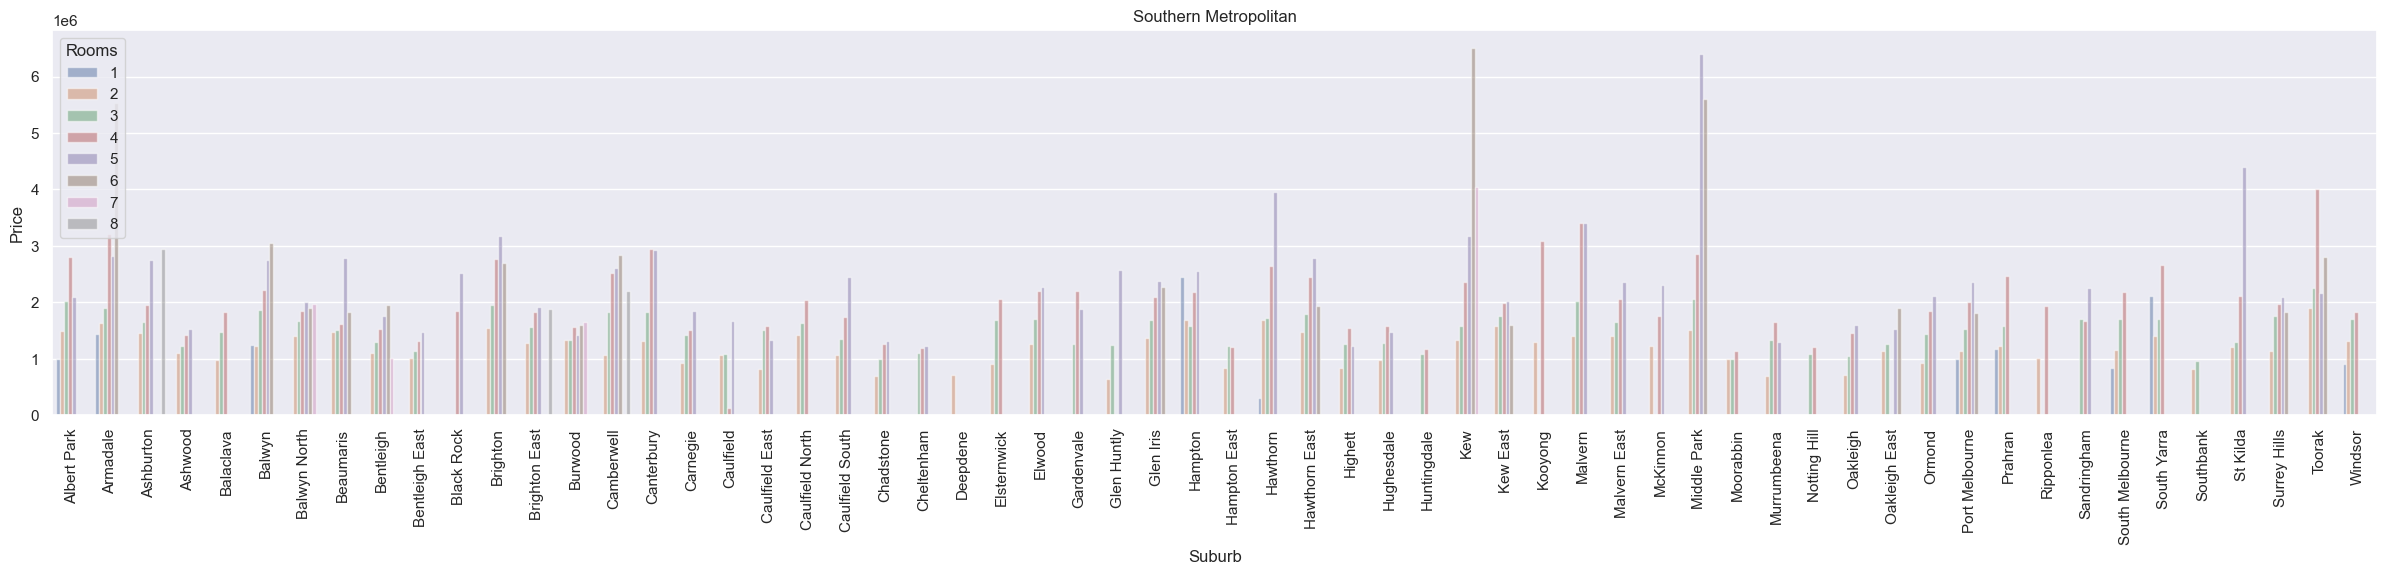

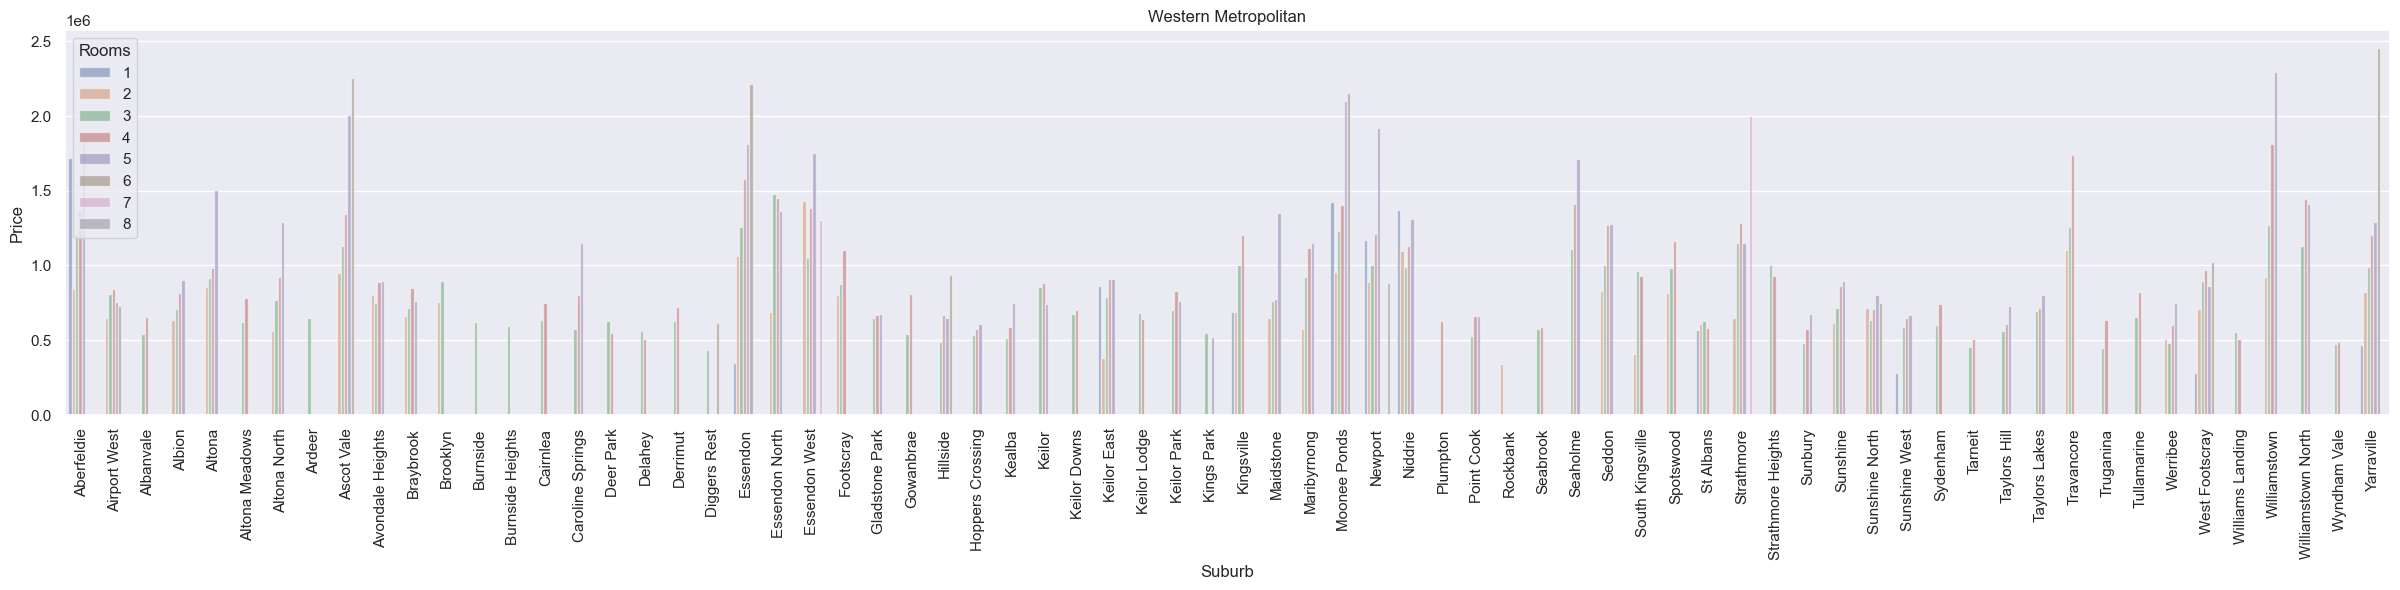

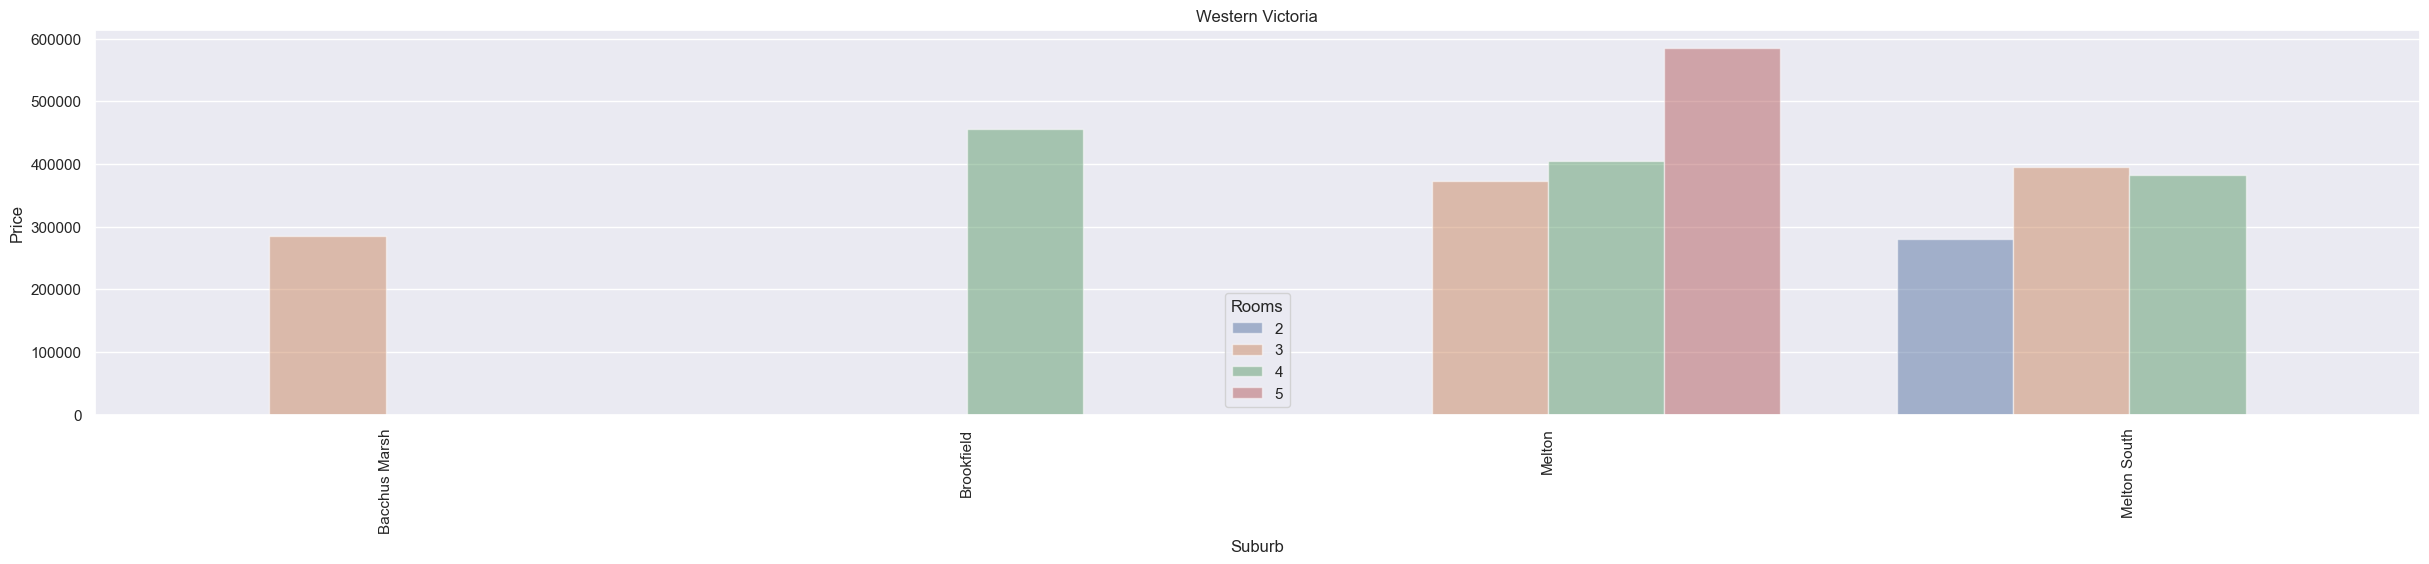

In [251]:
for i in df_room_sub_price['Regionname'].unique():
     get_pricerooms(df_room_sub_price[(df_room_sub_price['Regionname'] == i) & (df_room_sub_price['Type'] == 'h')])

### Explain:

### In our previous study, we found that house prices in Melbourne are significantly higher compared to townhouses and units. It is evident that the house type is the primary factor influencing property prices. In this section, through the use of statistical charts, we discovered that there is a positive correlation between the number of rooms and the price of the property, particularly within the range of one to five rooms. The price reaches its peak around four to five rooms and gradually decreases starting from six rooms.

### In the affluent Southern Metropolitan region, the most popular choice is a house with four to five rooms, which also commands a higher average price. And this outcome actully matches the one we mention before. However, in some exclusive neighborhoods of the southern region such as Toorak, Kew, and Hawthorn, houses with six rooms tend to have higher prices. One reason could be the limited availability of houses with six rooms, and another reason is that affluent individuals often desire more rooms to enjoy their luxurious lifestyle. This pattern can also be observed in other suburbs with exceptionally high property prices in different regions.



In [ ]:
#### 1-5, over 5, 去掉样本比较少的地区，reable, 研究异常值

In [ ]:
###只选大墨尔本地区，去掉样本容量很少的suburb

### 2.3.1.3 Land size


In [26]:
df_house['Landsize'].max()

433014.0

In [44]:
##land size
df_landsize_price=df_house
bins = [0,200,500,600,700,800,1000,2000,10000,np.inf]
group_names=['0-200', '200-500', '500-1000','1000-2000','2000-10000','10000-50000']
df_landsize_price['Landsize_group']=pd.cut(df_landsize_price['Landsize'], bins=bins, labels=group_names)

In [45]:
df_landsize_price

Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford      85 Turner St      2    h  1480000.0      S   
1         Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2         Abbotsford      5 Charles St      3    h  1465000.0     SP   
3         Abbotsford  40 Federation La      3    h   850000.0     PI   
4         Abbotsford       55a Park St      4    h  1600000.0     VB   
...              ...               ...    ...  ...        ...    ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000.0      S   
13576   Williamstown     77 Merrett Dr      3    h  1031000.0     SP   
13577   Williamstown       83 Power St      3    h  1170000.0      S   
13578   Williamstown      96 Verdon St      4    h  2500000.0     PI   
13579     Yarraville        6 Agnes St      4    h  1285000.0     SP   

        SellerG        Date  Distance  Postcode  ...  Car  Landsize  \
0        Biggin   3/12/2016       2.5    3067.0  ...  1.0     202.0   
1        Biggin   4/02/2016       2.5    3067.0  ...  0.0     156.0   
2        Biggin   4/03/2017       2.5    3067.0  ...  0.0     134.0   
3        Biggin   4/03/2017       2.5    3067.0  ...  1.0      94.0   
4        Nelson   4/06/2016       2.5    3067.0  ...  2.0     120.0   
...         ...         ...       ...       ...  ...  ...       ...   
13575     Barry  26/08/2017      16.7    3150.0  ...  2.0     652.0   
13576  Williams  26/08/2017       6.8    3016.0  ...  2.0     333.0   
13577     Raine  26/08/2017       6.8    3016.0  ...  4.0     436.0   
13578   Sweeney  26/08/2017       6.8    3016.0  ...  5.0     866.0   
13579   Village  26/08/2017       6.3    3013.0  ...  1.0     362.0   

       BuildingArea  YearBuilt  CouncilArea  Lattitude Longtitude  \
0               NaN        NaN        Yarra  -37.79960  144.99840   
1              79.0     1900.0        Yarra  -37.80790  144.99340   
2             150.0     1900.0        Yarra  -37.80930  144.99440   
3               NaN        NaN        Yarra  -37.79690  144.99690   
4             142.0     2014.0        Yarra  -37.80720  144.99410   
...             ...        ...          ...        ...        ...   
13575           NaN     1981.0          NaN  -37.90562  145.16761   
13576         133.0     1995.0          NaN  -37.85927  144.87904   
13577           NaN     1997.0          NaN  -37.85274  144.88738   
13578         157.0     1920.0          NaN  -37.85908  144.89299   
13579         112.0     1920.0          NaN  -37.81188  144.88449   

                       Regionname  Propertycount Landsize_group  
0           Northern Metropolitan         4019.0        200-500  
1           Northern Metropolitan         4019.0          0-200  
2           Northern Metropolitan         4019.0          0-200  
3           Northern Metropolitan         4019.0          0-200  
4           Northern Metropolitan         4019.0          0-200  
...                           ...            ...            ...  
13575  South-Eastern Metropolitan         7392.0       500-1000  
13576        Western Metropolitan         6380.0        200-500  
13577        Western Metropolitan         6380.0        200-500  
13578        Western Metropolitan         6380.0       500-1000  
13579        Western Metropolitan         6543.0        200-500  

[13580 rows x 22 columns]

In [46]:
df_landsize_price['Landsize_group'].value_counts()

500-1000       5509
200-500        3590
0-200          1876
1000-2000       428
2000-10000      212
10000-50000      26
Name: Landsize_group, dtype: int64

In [47]:
df_landsize_price.groupby(['Regionname','Suburb','Landsize_group']).count()

Address  Rooms  Type  Price  \
Regionname           Suburb     Landsize_group                                
Eastern Metropolitan Abbotsford 0-200                 0      0     0      0   
                                200-500               0      0     0      0   
                                500-1000              0      0     0      0   
                                1000-2000             0      0     0      0   
                                2000-10000            0      0     0      0   
...                                                 ...    ...   ...    ...   
Western Victoria     Yarraville 200-500               0      0     0      0   
                                500-1000              0      0     0      0   
                                1000-2000             0      0     0      0   
                                2000-10000            0      0     0      0   
                                10000-50000           0      0     0      0   

                                                Method  SellerG  Date  \
Regionname           Suburb     Landsize_group                          
Eastern Metropolitan Abbotsford 0-200                0        0     0   
                                200-500              0        0     0   
                                500-1000             0        0     0   
                                1000-2000            0        0     0   
                                2000-10000           0        0     0   
...                                                ...      ...   ...   
Western Victoria     Yarraville 200-500              0        0     0   
                                500-1000             0        0     0   
                                1000-2000            0        0     0   
                                2000-10000           0        0     0   
                                10000-50000          0        0     0   

                                                Distance  Postcode  Bedroom2  \
Regionname           Suburb     Landsize_group                                 
Eastern Metropolitan Abbotsford 0-200                  0         0         0   
                                200-500                0         0         0   
                                500-1000               0         0         0   
                                1000-2000              0         0         0   
                                2000-10000             0         0         0   
...                                                  ...       ...       ...   
Western Victoria     Yarraville 200-500                0         0         0   
                                500-1000               0         0         0   
                                1000-2000              0         0         0   
                                2000-10000             0         0         0   
                                10000-50000            0         0         0   

                                                Bathroom  Car  Landsize  \
Regionname           Suburb     Landsize_group                            
Eastern Metropolitan Abbotsford 0-200                  0    0         0   
                                200-500                0    0         0   
                                500-1000               0    0         0   
                                1000-2000              0    0         0   
                                2000-10000             0    0         0   
...                                                  ...  ...       ...   
Western Victoria     Yarraville 200-500                0    0         0   
                                500-1000               0    0         0   
                                1000-2000              0    0         0   
                                2000-10000             0    0         0   
                                10000-50000            0    0         0   

                                                Build

In [43]:
df_landsize_price

Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford      85 Turner St      2    h  1480000.0      S   
1         Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2         Abbotsford      5 Charles St      3    h  1465000.0     SP   
3         Abbotsford  40 Federation La      3    h   850000.0     PI   
4         Abbotsford       55a Park St      4    h  1600000.0     VB   
...              ...               ...    ...  ...        ...    ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000.0      S   
13576   Williamstown     77 Merrett Dr      3    h  1031000.0     SP   
13577   Williamstown       83 Power St      3    h  1170000.0      S   
13578   Williamstown      96 Verdon St      4    h  2500000.0     PI   
13579     Yarraville        6 Agnes St      4    h  1285000.0     SP   

        SellerG        Date  Distance  Postcode  ...  Car  Landsize  \
0        Biggin   3/12/2016       2.5    3067.0  ...  1.0     202.0   
1        Biggin   4/02/2016       2.5    3067.0  ...  0.0     156.0   
2        Biggin   4/03/2017       2.5    3067.0  ...  0.0     134.0   
3        Biggin   4/03/2017       2.5    3067.0  ...  1.0      94.0   
4        Nelson   4/06/2016       2.5    3067.0  ...  2.0     120.0   
...         ...         ...       ...       ...  ...  ...       ...   
13575     Barry  26/08/2017      16.7    3150.0  ...  2.0     652.0   
13576  Williams  26/08/2017       6.8    3016.0  ...  2.0     333.0   
13577     Raine  26/08/2017       6.8    3016.0  ...  4.0     436.0   
13578   Sweeney  26/08/2017       6.8    3016.0  ...  5.0     866.0   
13579   Village  26/08/2017       6.3    3013.0  ...  1.0     362.0   

       BuildingArea  YearBuilt  CouncilArea  Lattitude Longtitude  \
0               NaN        NaN        Yarra  -37.79960  144.99840   
1              79.0     1900.0        Yarra  -37.80790  144.99340   
2             150.0     1900.0        Yarra  -37.80930  144.99440   
3               NaN        NaN        Yarra  -37.79690  144.99690   
4             142.0     2014.0        Yarra  -37.80720  144.99410   
...             ...        ...          ...        ...        ...   
13575           NaN     1981.0          NaN  -37.90562  145.16761   
13576         133.0     1995.0          NaN  -37.85927  144.87904   
13577           NaN     1997.0          NaN  -37.85274  144.88738   
13578         157.0     1920.0          NaN  -37.85908  144.89299   
13579         112.0     1920.0          NaN  -37.81188  144.88449   

                       Regionname  Propertycount Landsize_group  
0           Northern Metropolitan         4019.0        200-500  
1           Northern Metropolitan         4019.0          0-200  
2           Northern Metropolitan         4019.0          0-200  
3           Northern Metropolitan         4019.0          0-200  
4           Northern Metropolitan         4019.0          0-200  
...                           ...            ...            ...  
13575  South-Eastern Metropolitan         7392.0       500-1000  
13576        Western Metropolitan         6380.0        200-500  
13577        Western Metropolitan         6380.0        200-500  
13578        Western Metropolitan         6380.0       500-1000  
13579        Western Metropolitan         6543.0        200-500  

[13580 rows x 22 columns]

### 2.3.1.4 Land area and building area ratio

In [63]:
df_house_region

Suburb          Address  Rooms Type      Price Method   SellerG  \
1         Abbotsford  25 Bloomburg St      2    h  1035000.0      S    Biggin   
2         Abbotsford     5 Charles St      3    h  1465000.0     SP    Biggin   
4         Abbotsford      55a Park St      4    h  1600000.0     VB    Nelson   
6         Abbotsford     124 Yarra St      3    h  1876000.0      S    Nelson   
7         Abbotsford    98 Charles St      2    h  1636000.0      S    Nelson   
...              ...              ...    ...  ...        ...    ...       ...   
13575  Wheelers Hill     12 Strada Cr      4    h  1245000.0      S     Barry   
13576   Williamstown    77 Merrett Dr      3    h  1031000.0     SP  Williams   
13577   Williamstown      83 Power St      3    h  1170000.0      S     Raine   
13578   Williamstown     96 Verdon St      4    h  2500000.0     PI   Sweeney   
13579     Yarraville       6 Agnes St      4    h  1285000.0     SP   Village   

             Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
1       4/02/2016       2.5    3067.0       2.0       1.0  0.0     156.0   
2       4/03/2017       2.5    3067.0       3.0       2.0  0.0     134.0   
4       4/06/2016       2.5    3067.0       3.0       1.0  2.0     120.0   
6       7/05/2016       2.5    3067.0       4.0       2.0  0.0     245.0   
7       8/10/2016       2.5    3067.0       2.0       1.0  2.0     256.0   
...           ...       ...       ...       ...       ...  ...       ...   
13575  26/08/2017      16.7    3150.0       4.0       2.0  2.0     652.0   
13576  26/08/2017       6.8    3016.0       3.0       2.0  2.0     333.0   
13577  26/08/2017       6.8    3016.0       3.0       2.0  4.0     436.0   
13578  26/08/2017       6.8    3016.0       4.0       1.0  5.0     866.0   
13579  26/08/2017       6.3    3013.0       4.0       1.0  1.0     362.0   

       BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
1              79.0     1900.0       Yarra  -37.80790   144.99340   
2             150.0     1900.0       Yarra  -37.80930   144.99440   
4             142.0     2014.0       Yarra  -37.80720   144.99410   
6             210.0     1910.0       Yarra  -37.80240   144.99930   
7             107.0     1890.0       Yarra  -37.80600   144.99540   
...             ...        ...         ...        ...         ...   
13575           NaN     1981.0         NaN  -37.90562   145.16761   
13576         133.0     1995.0         NaN  -37.85927   144.87904   
13577           NaN     1997.0         NaN  -37.85274   144.88738   
13578         157.0     1920.0         NaN  -37.85908   144.89299   
13579         112.0     1920.0         NaN  -37.81188   144.88449   

                       Regionname  Propertycount YearBuilt_category  
1           Northern Metropolitan         4019.0       (1500, 1900]  
2           Northern Metropolitan         4019.0       (1500, 1900]  
4           Northern Metropolitan         4019.0       (2010, 2020]  
6           Northern Metropolitan         4019.0       (1900, 1930]  
7           Northern Metropolitan         4019.0       (1500, 1900]  
...                           ...            ...                ...  
13575  South-Eastern Metropolitan         7392.0       (1970, 1990]  
13576        Western Metropolitan         6380.0       (1990, 2000]  
13577        Western Metropolitan         6380.0       (1990, 2000]  
13578        Western Metropolitan         6380.0       (1900, 1930]  
13579        Western Metropolitan         6543.0       (1900, 1930]  

[8124 rows x 22 columns]

In [67]:
df_house_BA_notnull = df_house_region.loc[~df_house_region['BuildingArea'].isnull()]
df_house_BA_notnull['BuildingArea'].isnull().sum()

0

In [65]:
df_house_BA_notnull['building_ratio'] = df_house_BA_notnull['BuildingArea']/df_house_BA_notnull['Landsize']

In [68]:
df_house_BA_notnull

Suburb          Address  Rooms Type      Price Method  \
1        Abbotsford  25 Bloomburg St      2    h  1035000.0      S   
2        Abbotsford     5 Charles St      3    h  1465000.0     SP   
4        Abbotsford      55a Park St      4    h  1600000.0     VB   
6        Abbotsford     124 Yarra St      3    h  1876000.0      S   
7        Abbotsford    98 Charles St      2    h  1636000.0      S   
...             ...              ...    ...  ...        ...    ...   
13572      Watsonia    76 Kenmare St      2    h   650000.0     PI   
13573      Werribee      5 Nuragi Ct      4    h   635000.0      S   
13576  Williamstown    77 Merrett Dr      3    h  1031000.0     SP   
13578  Williamstown     96 Verdon St      4    h  2500000.0     PI   
13579    Yarraville       6 Agnes St      4    h  1285000.0     SP   

             SellerG        Date  Distance  Postcode  Bedroom2  Bathroom  Car  \
1             Biggin   4/02/2016       2.5    3067.0       2.0       1.0  0.0   
2             Biggin   4/03/2017       2.5    3067.0       3.0       2.0  0.0   
4             Nelson   4/06/2016       2.5    3067.0       3.0       1.0  2.0   
6             Nelson   7/05/2016       2.5    3067.0       4.0       2.0  0.0   
7             Nelson   8/10/2016       2.5    3067.0       2.0       1.0  2.0   
...              ...         ...       ...       ...       ...       ...  ...   
13572       Morrison  26/08/2017      14.5    3087.0       2.0       1.0  1.0   
13573  hockingstuart  26/08/2017      14.7    3030.0       4.0       2.0  1.0   
13576       Williams  26/08/2017       6.8    3016.0       3.0       2.0  2.0   
13578        Sweeney  26/08/2017       6.8    3016.0       4.0       1.0  5.0   
13579        Village  26/08/2017       6.3    3013.0       4.0       1.0  1.0   

       Landsize  BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
1         156.0          79.0     1900.0       Yarra  -37.80790   144.99340   
2         134.0         150.0     1900.0       Yarra  -37.80930   144.99440   
4         120.0         142.0     2014.0       Yarra  -37.80720   144.99410   
6         245.0         210.0     1910.0       Yarra  -37.80240   144.99930   
7         256.0         107.0     1890.0       Yarra  -37.80600   144.99540   
...         ...           ...        ...         ...        ...         ...   
13572     210.0          79.0     2006.0         NaN  -37.70657   145.07878   
13573     662.0         172.0     1980.0         NaN  -37.89327   144.64789   
13576     333.0         133.0     1995.0         NaN  -37.85927   144.87904   
13578     866.0         157.0     1920.0         NaN  -37.85908   144.89299   
13579     362.0         112.0     1920.0         NaN  -37.81188   144.88449   

                  Regionname  Propertycount YearBuilt_category  building_ratio  
1      Northern Metropolitan         4019.0       (1500, 1900]        0.506410  
2      Northern Metropolitan         4019.0       (1500, 1900]        1.119403  
4      Northern Metropolitan         4019.0       (2010, 2020]        1.183333  
6      Northern Metropolitan         4019.0       (1900, 1930]        0.857143  
7      Northern Metropolitan         4019.0       (1500, 1900]        0.417969  
...                      ...            ...                ...             ...  
13572  Northern Metropolitan         2329.0       (2000, 2010]        0.376190  
13573   Western Metropolitan        16166.0       (1970, 1990]        0.259819  
13576   Western Metropolitan         6380.0       (1990, 2000]        0.399399  
13578   Western Metropolitan         6380.0       (1900, 1930]        0.181293  
13579   Western Metropolitan         6543.0       (1900, 1930]        0.309392  

[6784 rows x 23 columns]

In [71]:
df_landsize_price=df_house
bins = [0,0.5,0.6,0.7,0.8,1,np.inf]
group_names=['0-0.5', '0.5-0.6', '0.6-0.7','0.7-0.8','0.8-1','1-1.5']
df_house_BA_notnull['ratio_group']=pd.cut(df_house_BA_notnull['building_ratio'], bins=bins, labels=group_names)

/var/folders/cc/lsytz9y15zdch0gnv4mhxgqr0000gn/T/ipykernel_52132/4234008746.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house_BA_notnull['ratio_group']=pd.cut(df_house_BA_notnull['building_ratio'], bins=bins, labels=group_names)


In [72]:
df_house_BA_notnull

Suburb          Address  Rooms Type      Price Method  \
1        Abbotsford  25 Bloomburg St      2    h  1035000.0      S   
2        Abbotsford     5 Charles St      3    h  1465000.0     SP   
4        Abbotsford      55a Park St      4    h  1600000.0     VB   
6        Abbotsford     124 Yarra St      3    h  1876000.0      S   
7        Abbotsford    98 Charles St      2    h  1636000.0      S   
...             ...              ...    ...  ...        ...    ...   
13572      Watsonia    76 Kenmare St      2    h   650000.0     PI   
13573      Werribee      5 Nuragi Ct      4    h   635000.0      S   
13576  Williamstown    77 Merrett Dr      3    h  1031000.0     SP   
13578  Williamstown     96 Verdon St      4    h  2500000.0     PI   
13579    Yarraville       6 Agnes St      4    h  1285000.0     SP   

             SellerG        Date  Distance  Postcode  Bedroom2  Bathroom  Car  \
1             Biggin   4/02/2016       2.5    3067.0       2.0       1.0  0.0   
2             Biggin   4/03/2017       2.5    3067.0       3.0       2.0  0.0   
4             Nelson   4/06/2016       2.5    3067.0       3.0       1.0  2.0   
6             Nelson   7/05/2016       2.5    3067.0       4.0       2.0  0.0   
7             Nelson   8/10/2016       2.5    3067.0       2.0       1.0  2.0   
...              ...         ...       ...       ...       ...       ...  ...   
13572       Morrison  26/08/2017      14.5    3087.0       2.0       1.0  1.0   
13573  hockingstuart  26/08/2017      14.7    3030.0       4.0       2.0  1.0   
13576       Williams  26/08/2017       6.8    3016.0       3.0       2.0  2.0   
13578        Sweeney  26/08/2017       6.8    3016.0       4.0       1.0  5.0   
13579        Village  26/08/2017       6.3    3013.0       4.0       1.0  1.0   

       Landsize  BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
1         156.0          79.0     1900.0       Yarra  -37.80790   144.99340   
2         134.0         150.0     1900.0       Yarra  -37.80930   144.99440   
4         120.0         142.0     2014.0       Yarra  -37.80720   144.99410   
6         245.0         210.0     1910.0       Yarra  -37.80240   144.99930   
7         256.0         107.0     1890.0       Yarra  -37.80600   144.99540   
...         ...           ...        ...         ...        ...         ...   
13572     210.0          79.0     2006.0         NaN  -37.70657   145.07878   
13573     662.0         172.0     1980.0         NaN  -37.89327   144.64789   
13576     333.0         133.0     1995.0         NaN  -37.85927   144.87904   
13578     866.0         157.0     1920.0         NaN  -37.85908   144.89299   
13579     362.0         112.0     1920.0         NaN  -37.81188   144.88449   

                  Regionname  Propertycount YearBuilt_category  \
1      Northern Metropolitan         4019.0       (1500, 1900]   
2      Northern Metropolitan         4019.0       (1500, 1900]   
4      Northern Metropolitan         4019.0       (2010, 2020]   
6      Northern Metropolitan         4019.0       (1900, 1930]   
7      Northern Metropolitan         4019.0       (1500, 1900]   
...                      ...            ...                ...   
13572  Northern Metropolitan         2329.0       (2000, 2010]   
13573   Western Metropolitan        16166.0       (1970, 1990]   
13576   Western Metropolitan         6380.0       (1990, 2000]   
13578   Western Metropolitan         6380.0       (1900, 1930]   
13579   Western Metropolitan         6543.0       (1900, 1930]   

       building_ratio ratioo_group ratio_group  
1            0.506410      0.5-0.6     0.5-0.6  
2            1.119403        1-1.5       1-1.5  
4            1.183333        1-1.5       1-1.5  
6            0.857143        0.8-1       0.8-1  
7            0.417969        0-0.5       0-0.5  
...               ...          ...         ...  
13572        0.376190        0-0.5       0-0.5  
13573        0.259819        0-0.5       0-0.5  
13576        0.3

In [77]:
df_house_BA_notnull_1 = df_house_BA_notnull.loc[~(df_house_BA_notnull['building_ratio'] > 1)]
df_house_BA_notnull_1

Suburb          Address  Rooms Type      Price Method  \
1        Abbotsford  25 Bloomburg St      2    h  1035000.0      S   
6        Abbotsford     124 Yarra St      3    h  1876000.0      S   
7        Abbotsford    98 Charles St      2    h  1636000.0      S   
9        Abbotsford    10 Valiant St      2    h  1097000.0      S   
11       Abbotsford  40 Nicholson St      3    h  1350000.0     VB   
...             ...              ...    ...  ...        ...    ...   
13572      Watsonia    76 Kenmare St      2    h   650000.0     PI   
13573      Werribee      5 Nuragi Ct      4    h   635000.0      S   
13576  Williamstown    77 Merrett Dr      3    h  1031000.0     SP   
13578  Williamstown     96 Verdon St      4    h  2500000.0     PI   
13579    Yarraville       6 Agnes St      4    h  1285000.0     SP   

             SellerG        Date  Distance  Postcode  Bedroom2  Bathroom  Car  \
1             Biggin   4/02/2016       2.5    3067.0       2.0       1.0  0.0   
6             Nelson   7/05/2016       2.5    3067.0       4.0       2.0  0.0   
7             Nelson   8/10/2016       2.5    3067.0       2.0       1.0  2.0   
9             Biggin   8/10/2016       2.5    3067.0       3.0       1.0  2.0   
11            Nelson  12/11/2016       2.5    3067.0       3.0       2.0  2.0   
...              ...         ...       ...       ...       ...       ...  ...   
13572       Morrison  26/08/2017      14.5    3087.0       2.0       1.0  1.0   
13573  hockingstuart  26/08/2017      14.7    3030.0       4.0       2.0  1.0   
13576       Williams  26/08/2017       6.8    3016.0       3.0       2.0  2.0   
13578        Sweeney  26/08/2017       6.8    3016.0       4.0       1.0  5.0   
13579        Village  26/08/2017       6.3    3013.0       4.0       1.0  1.0   

       Landsize  BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
1         156.0          79.0     1900.0       Yarra  -37.80790   144.99340   
6         245.0         210.0     1910.0       Yarra  -37.80240   144.99930   
7         256.0         107.0     1890.0       Yarra  -37.80600   144.99540   
9         220.0          75.0     1900.0       Yarra  -37.80100   144.99890   
11        214.0         190.0     2005.0       Yarra  -37.80850   144.99640   
...         ...           ...        ...         ...        ...         ...   
13572     210.0          79.0     2006.0         NaN  -37.70657   145.07878   
13573     662.0         172.0     1980.0         NaN  -37.89327   144.64789   
13576     333.0         133.0     1995.0         NaN  -37.85927   144.87904   
13578     866.0         157.0     1920.0         NaN  -37.85908   144.89299   
13579     362.0         112.0     1920.0         NaN  -37.81188   144.88449   

                  Regionname  Propertycount YearBuilt_category  \
1      Northern Metropolitan         4019.0       (1500, 1900]   
6      Northern Metropolitan         4019.0       (1900, 1930]   
7      Northern Metropolitan         4019.0       (1500, 1900]   
9      Northern Metropolitan         4019.0       (1500, 1900]   
11     Northern Metropolitan         4019.0       (2000, 2010]   
...                      ...            ...                ...   
13572  Northern Metropolitan         2329.0       (2000, 2010]   
13573   Western Metropolitan        16166.0       (1970, 1990]   
13576   Western Metropolitan         6380.0       (1990, 2000]   
13578   Western Metropolitan         6380.0       (1900, 1930]   
13579   Western Metropolitan         6543.0       (1900, 1930]   

       building_ratio ratioo_group ratio_group  
1            0.506410      0.5-0.6     0.5-0.6  
6            0.857143        0.8-1       0.8-1  
7            0.417969        0-0.5       0-0.5  
9            0.340909        0-0.5       0-0.5  
11           0.887850        0.8-1       0.8-1  
...               ...          ...         ...  
13572        0.376190        0-0.5       0-0.5  
13573        0.259819        0-0.5       0-0.5  
13576        0.3

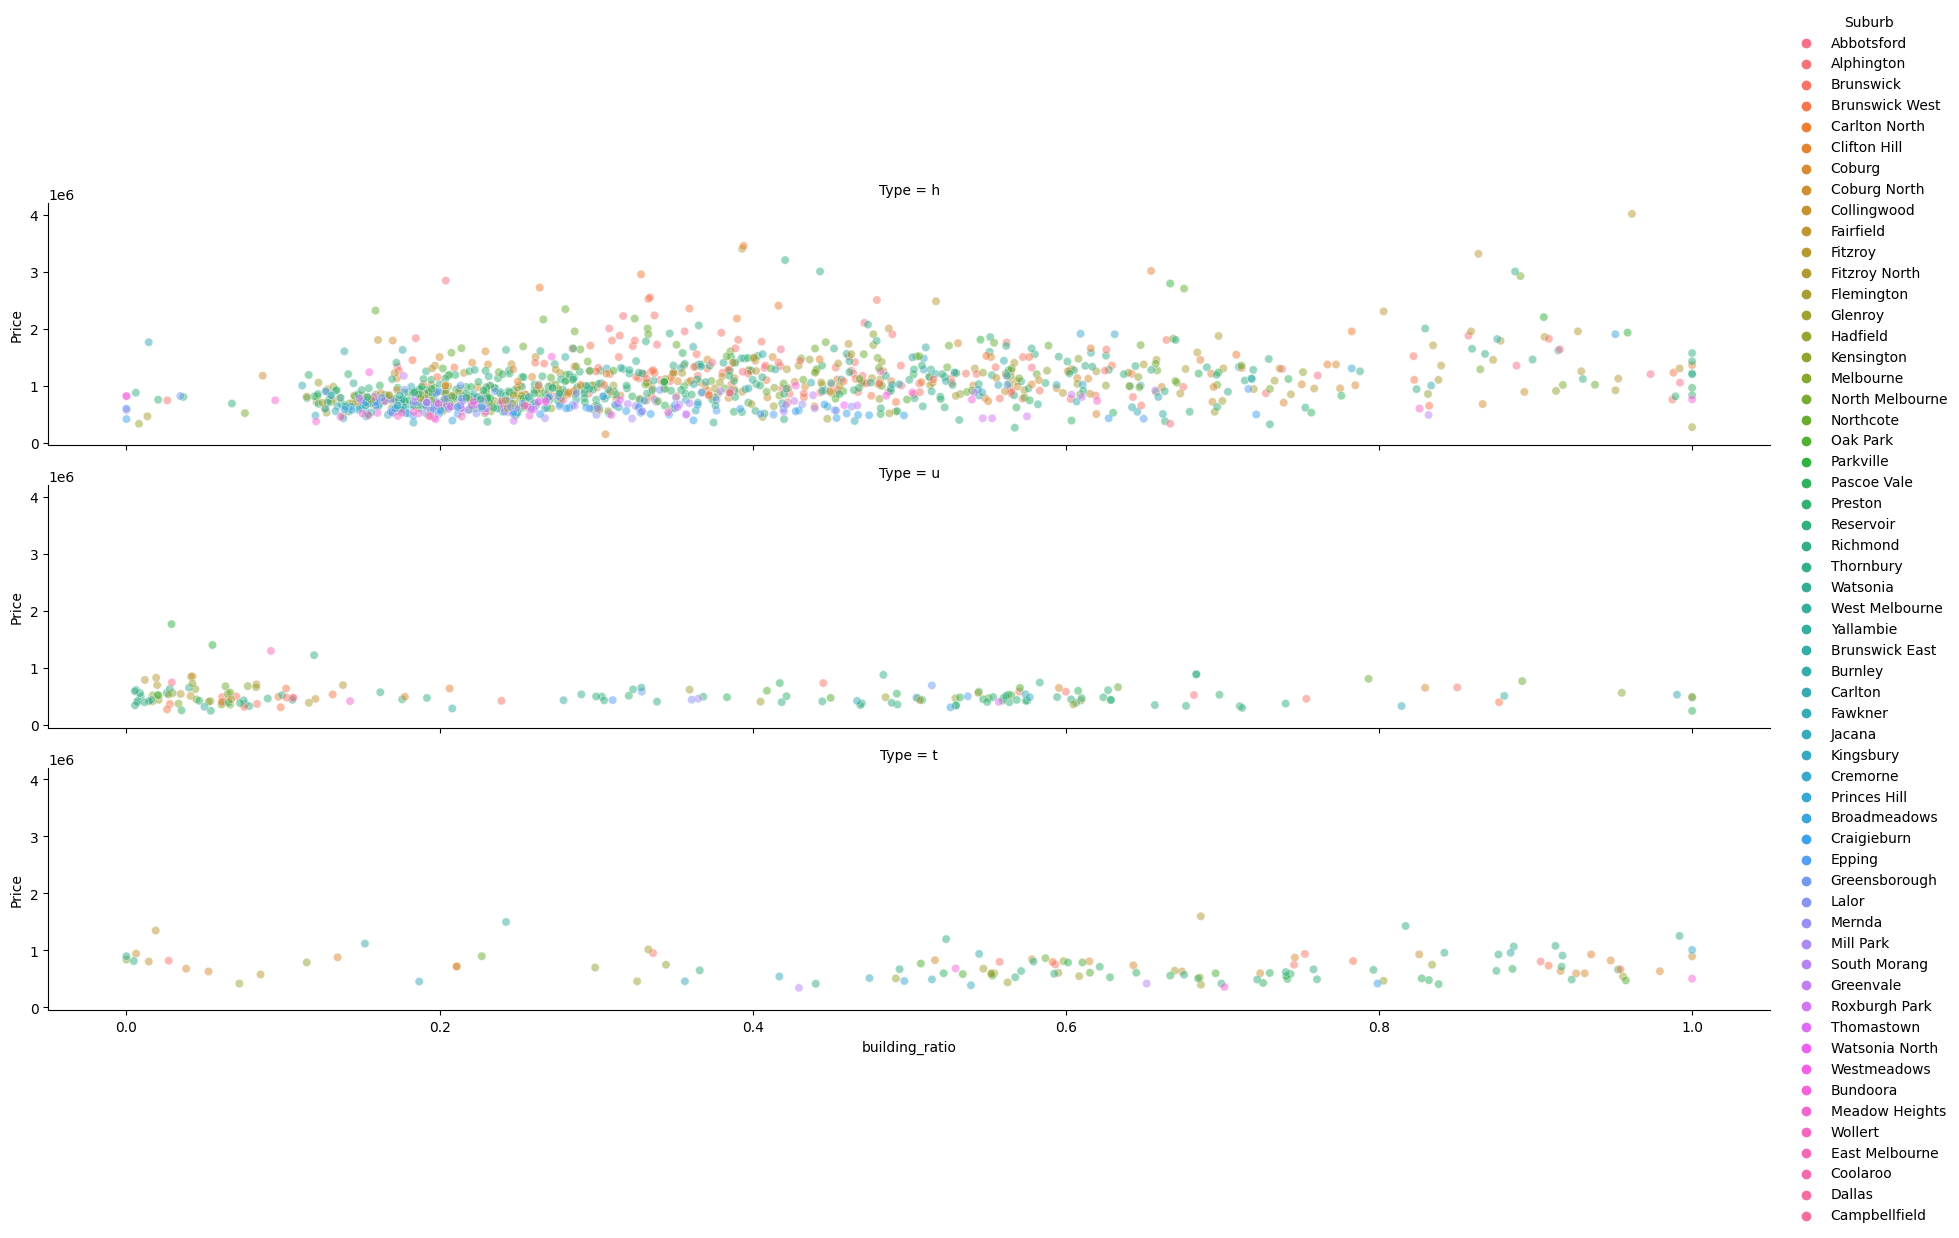

In [81]:
sns.relplot(x='building_ratio',y='Price',
            data=df_house_BA_notnull_1[df_house_BA_notnull_1['Regionname']=='Northern Metropolitan'],
           kind='scatter', hue='Suburb', legend="full", row='Type', alpha=.5, height=3, aspect=6)

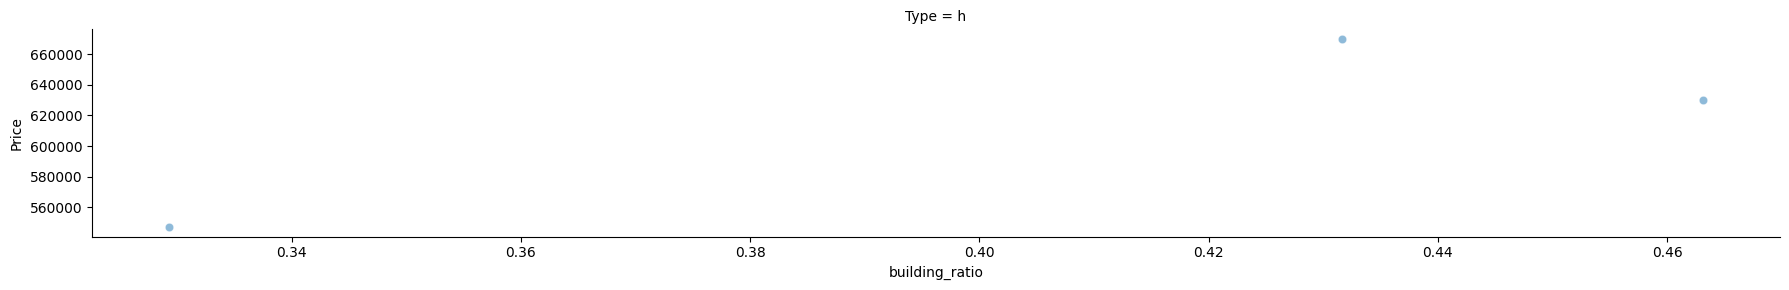

In [83]:
sns.relplot(x='building_ratio',y='Price',
            data=df_house_BA_notnull_1[(df_house_BA_notnull_1['Regionname']=='Northern Metropolitan') & (df_house_BA_notnull_1['Suburb']=='Mernda')],
           kind='scatter', legend="full", row='Type', alpha=.5, height=3, aspect=6)

### 2.3.1.5 Council

## 2.4 Selling

In [ ]:
### 墨尔本每个区在售的房产有多少套

In [ ]:
## Region

In [15]:
## selling situation 

## 2.5 melbourne market

In [12]:
## Q1.6 In the overall timeline, is the housing price rising or falling? Which month is the peak period for transactions? 

In [13]:
##房屋销售情况，timeline， suburb

### Q1.1: any relationship between distance and price according to different suburbs

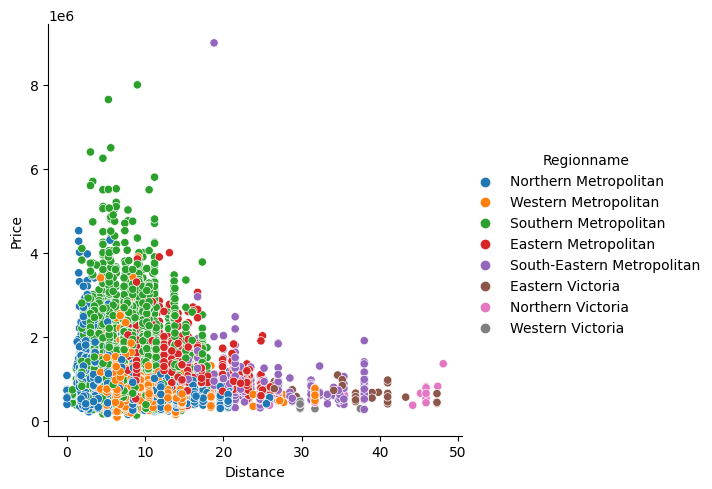

In [36]:
sns.relplot(x='Distance',y='Price',data=df_house,kind='scatter',hue='Regionname')

(0.0, 20000.0)

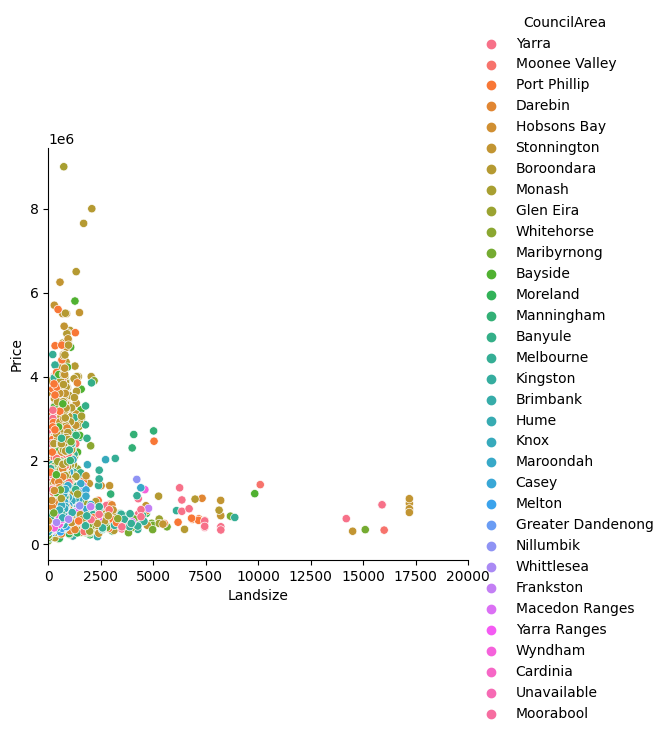

In [40]:
sns.relplot(x='Landsize',y='Price',data=df_house,kind='scatter',hue='CouncilArea')
plt.xlim(0, 20000)

## Q1.2 Any price difference between eastern suburb, northern suburb, western suburb, southern suburb?

## Q1.4 Which suburb(postcode) has the higest price?

## Q1.5 What is the median price for differenct suburb?

## Q1.6 In the overall timeline, is the housing price rising or falling? Which month is the peak period for transactions? 

## Q1.7 Does the construction year of a house have an impact on its price?

## Q1.8 Any effect from bedroom number on price? 

## Q1.9 Any effect from hose type on price?

## Q1.10: Any Regression Analysis I can do to predict the price trand according to different suburb, house type, land size and construction year?

## Q1.11: Which concil has better performance on price?

## Q1.12: Which suburb has the fastest price growth, and which district is experiencing the steepest decline?